<a href="https://colab.research.google.com/github/amr1963/Customer-Churn-Prediction-using-Telco-datasaet/blob/main/Customer_Churn_Prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import resample


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler


import missingno as msno


import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
%matplotlib inline
import pickle
from sklearn.feature_selection import f_classif, mutual_info_classif

# **data read**

In [ ]:
df = pd.read_csv("/content/customer_churn_dataset-training-master.csv")


In [ ]:
print("Training data shape:", df.shape)



Training data shape: (440833, 12)


In [ ]:
# Describe numerical features of training data
print(df.describe())

          CustomerID            Age         Tenure  Usage Frequency  \
count  440832.000000  440832.000000  440832.000000    440832.000000   
mean   225398.667955      39.373153      31.256336        15.807494   
std    129531.918550      12.442369      17.255727         8.586242   
min         2.000000      18.000000       1.000000         1.000000   
25%    113621.750000      29.000000      16.000000         9.000000   
50%    226125.500000      39.000000      32.000000        16.000000   
75%    337739.250000      48.000000      46.000000        23.000000   
max    449999.000000      65.000000      60.000000        30.000000   

       Support Calls  Payment Delay    Total Spend  Last Interaction  \
count  440832.000000  440832.000000  440832.000000     440832.000000   
mean        3.604437      12.965722     631.616223         14.480868   
std         3.070218       8.258063     240.803001          8.596208   
min         0.000000       0.000000     100.000000          1.000000   


In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [ ]:
df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [ ]:
churn_check= df['Churn'].value_counts()
print(churn_check)
#1>>yes
#0>>no

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64


<ipython-input-9-3283b89003f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'Churn', y = 'Percentage', data = eda_percentage.head(10), palette='Purples')


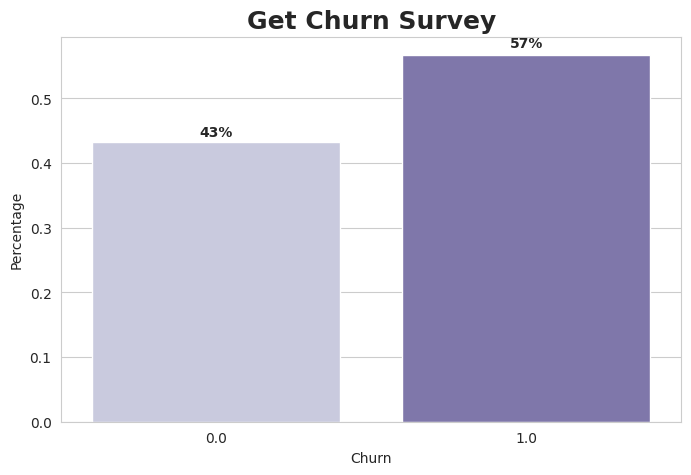

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Churn Survey', fontsize=18, fontweight='bold')
eda_percentage = df['Churn'].value_counts(normalize = True).rename_axis('Churn').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'Churn', y = 'Percentage', data = eda_percentage.head(10), palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

### **cleaning dataset**

In [ ]:
# Check for NaN values
print("NaN values in the Train_dataset:")
print(df.isna().sum())

# Check for None values
print("\nNone values in the Train_dataset:")
print(df.isnull().sum())



# Check for NaN specifically in the Churn column
print("\nNaN values in Churn column :", df['Churn'].isna().sum())


# Check for infinite values
print("\nInfinite values in the Train_dataset:")
print(np.isinf(df.select_dtypes(include=np.number)).sum())


# Display rows where Churn is NaN
print("\nRows where Churn is NaN :")
print(df[df['Churn'].isna()])

# Display rows where Churn is None
print("\nRows where Churn is None :")
print(df[df['Churn'].isnull()])

NaN values in the Train_dataset:
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

None values in the Train_dataset:
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

NaN values in Churn column : 1

Infinite values in the Train_dataset:
CustomerID          0
Age                 0
Tenure              0
Usage Frequency     0
Support Calls       0
Payment Delay       0
Total Spend         0
Last Interaction    0
Churn               0
dtype: int64

Rows where Churn is NaN :
        CustomerID  Age Gender  Tenure  Usage

In [ ]:
#  Remove rows with NaN in the Churn column
df = df.dropna(subset=['Churn'])

# Check the cleaned dataset
print("NaN values after cleaning Train:")
print(df.isna().sum())



NaN values after cleaning Train:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [ ]:
# Check for duplicates
duplicates = df[df.duplicated()]
count_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", count_duplicates)


Number of duplicate rows: 0


In [ ]:
gender_check= df['Gender'].value_counts()
print(gender_check)

Gender
Male      250252
Female    190580
Name: count, dtype: int64


In [ ]:
Subscription_Type_check= df['Subscription Type'].value_counts()
print(Subscription_Type_check)

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64


In [ ]:
Contract_Length_check= df['Contract Length'].value_counts()
print(Contract_Length_check)

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64


### **Dataset Visulization**

In [ ]:
def categorical_visualization(col):
    plt.subplot(1,2,1)
    sns.countplot(x=col,data=df)
    plt.subplot(1,2,2)
    df[col].value_counts().plot(kind='pie',autopct='%0.2f%%')
    plt.tight_layout()
    plt.show()


def numerical_visualization(col):
    plt.subplot(1,2,1)
    sns.kdeplot(x=col,data=df)
    plt.grid()
    plt.subplot(1,2,2)
    sns.boxplot(x=col,data=df)
    plt.tight_layout()
    plt.show()

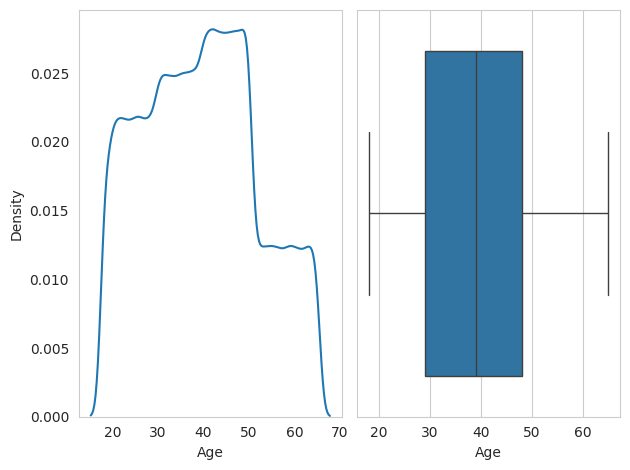

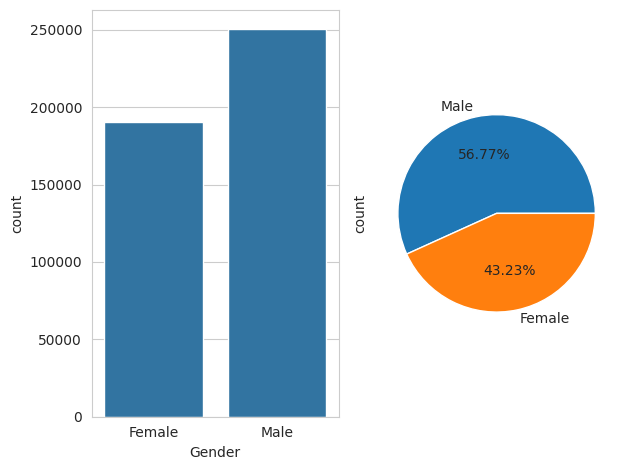

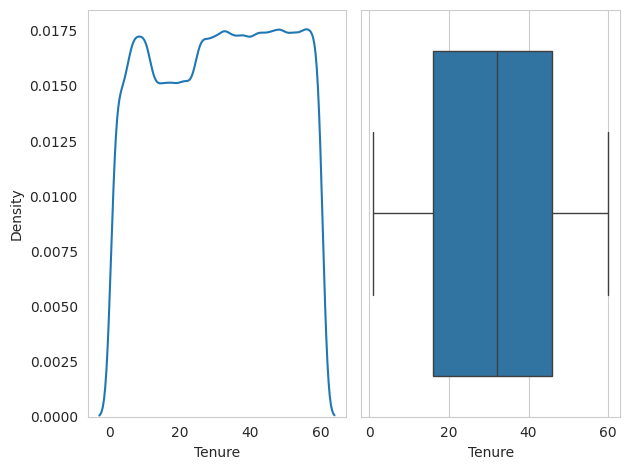

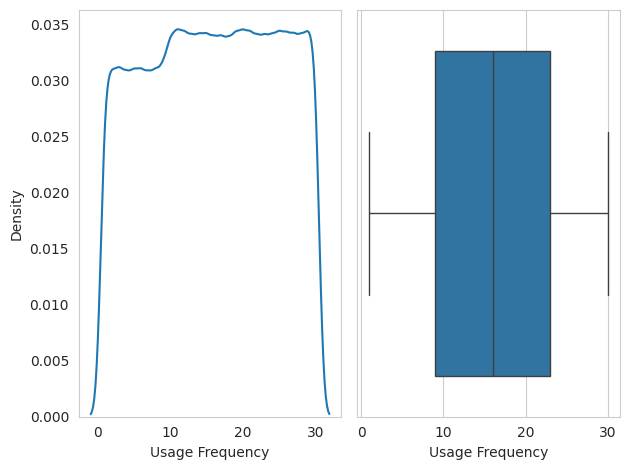

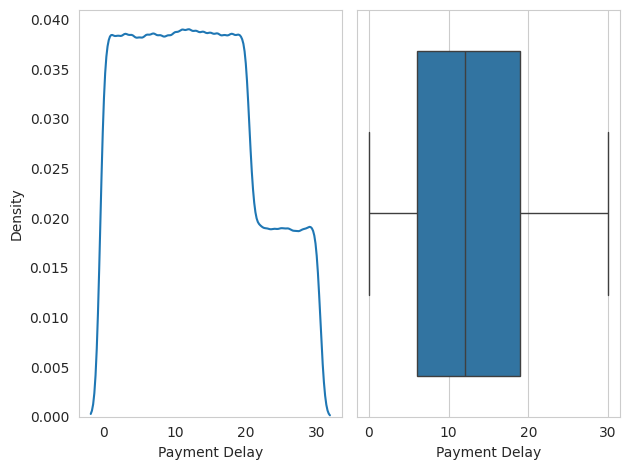

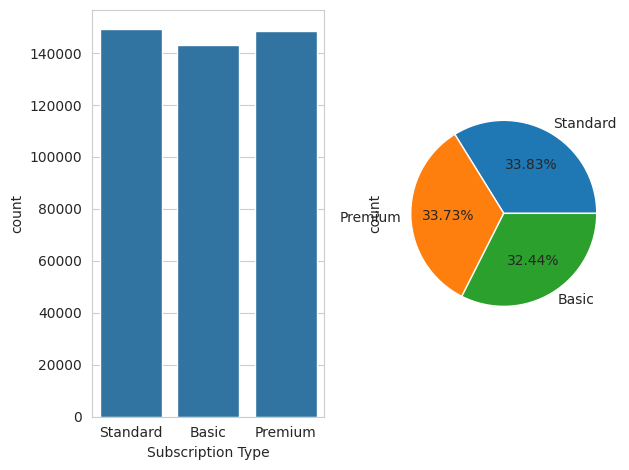

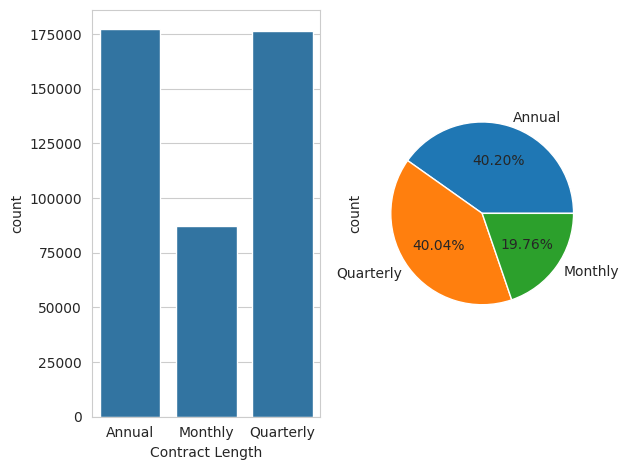

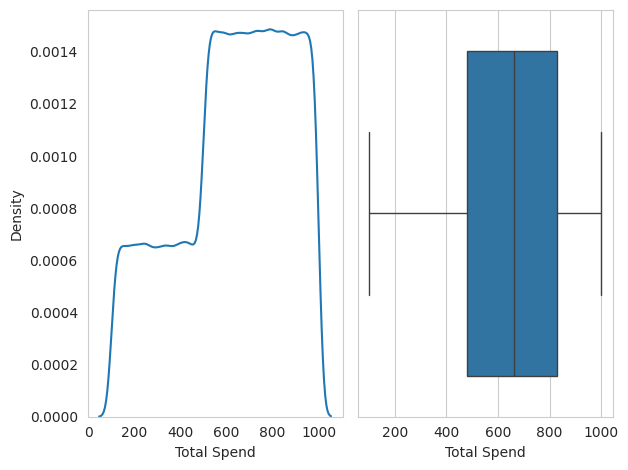

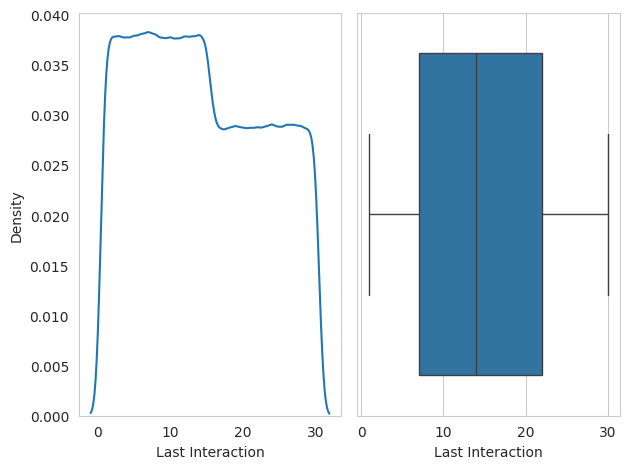

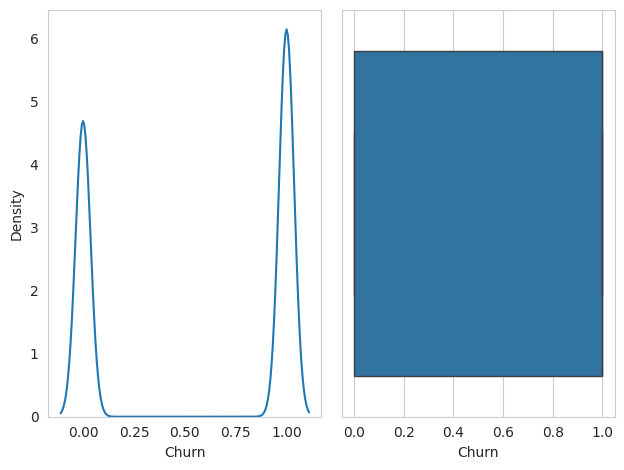

In [ ]:
for i in df.columns:
    if df[i].dtype=='object':
        categorical_visualization(i)
    else:
        numerical_visualization(i)

In [ ]:
def drop_cols(df,col):
    df=df.drop(col,axis=1)
    return df

df=drop_cols(df,"CustomerID")

print("Train Data")
df.head()


Train Data


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


# **Label Encoding**

In [ ]:

from sklearn.preprocessing import LabelEncoder

# List of categorical columns you want to label encode
object_cols = ['Gender', 'Subscription Type', 'Contract Length']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Loop through each categorical column and perform label encoding
for col in object_cols:
    # Handle mixed data types by converting everything to strings
    df[col] = df[col].astype(str)

    # Fit the label encoder on the column
    label_encoder.fit(df[col])

    # Transform the column values
    df[col] = label_encoder.transform(df[col])

In [ ]:
# Separate features and target
#from sklearn.preprocessing import LabelEncoder
X = df.drop('Churn', axis=1)
y = df['Churn']



# Iterate and encode through the specified categorical columns
for column in object_cols:
    X[column] = label_encoder.fit_transform(X[column])
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


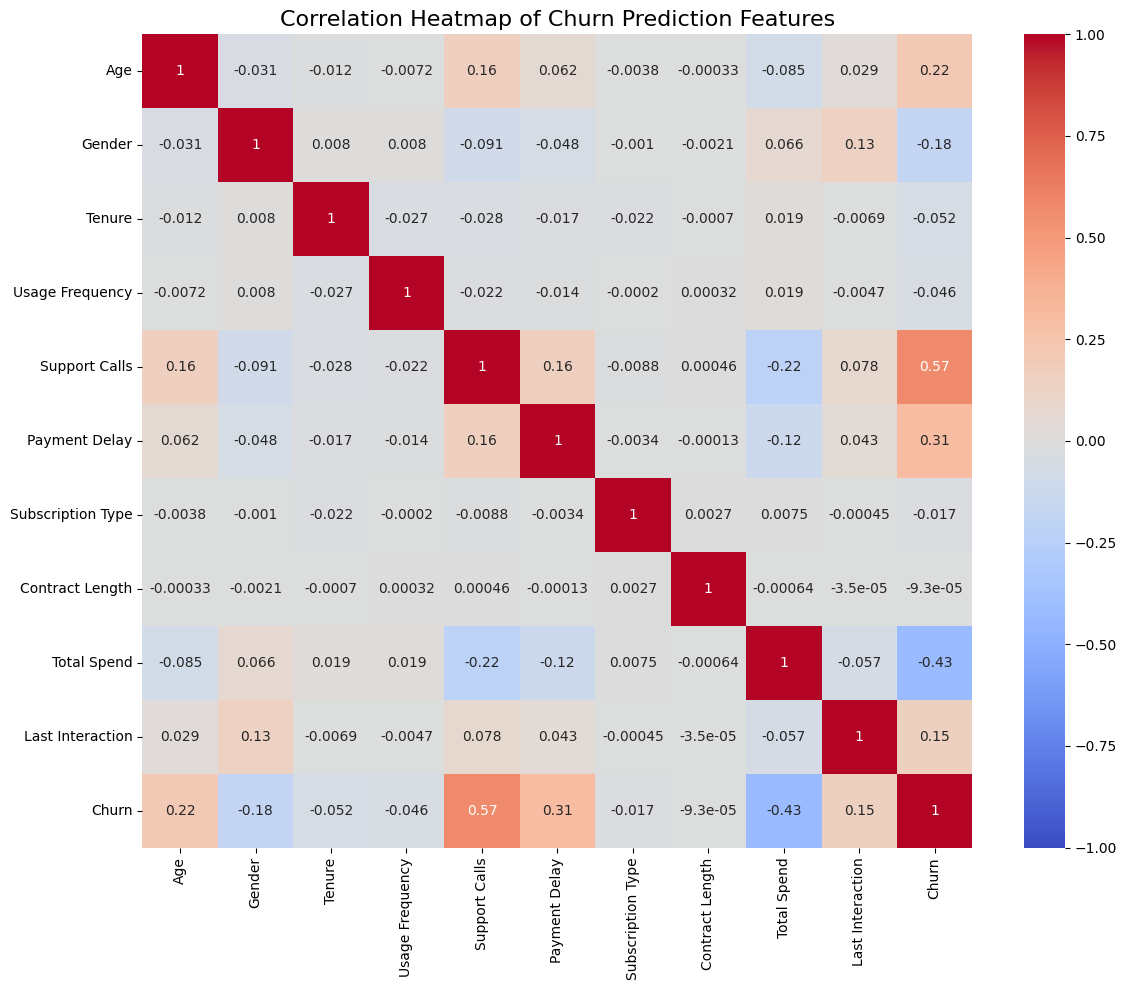

Correlation Matrix:
                        Age    Gender    Tenure  Usage Frequency  \
Age                1.000000 -0.031419 -0.011630        -0.007190   
Gender            -0.031419  1.000000  0.007978         0.007978   
Tenure            -0.011630  0.007978  1.000000        -0.026800   
Usage Frequency   -0.007190  0.007978 -0.026800         1.000000   
Support Calls      0.158451 -0.091212 -0.027640        -0.022013   
Payment Delay      0.061738 -0.048449 -0.016588        -0.014470   
Subscription Type -0.003816 -0.001018 -0.022416        -0.000197   
Contract Length   -0.000334 -0.002120 -0.000702         0.000321   
Total Spend       -0.084684  0.066138  0.019006         0.018631   
Last Interaction   0.028980  0.134786 -0.006903        -0.004662   
Churn              0.218394 -0.175395 -0.051919        -0.046101   

                   Support Calls  Payment Delay  Subscription Type  \
Age                     0.158451       0.061738          -0.003816   
Gender                 

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Set the title
plt.title('Correlation Heatmap of Churn Prediction Features', fontsize=16)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Save the heatmap as an image file
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')


# Display the plot
plt.show()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Identify highly correlated features
high_correlation = np.abs(correlation_matrix) > 0.8
np.fill_diagonal(high_correlation.values, False)
highly_correlated_features = np.where(high_correlation)

print("\nHighly correlated features (correlation > 0.8):")
for i, j in zip(*highly_correlated_features):
    if i < j:  # To avoid printing both (i,j) and (j,i)
       print(f"{correlation_matrix.index[i]} and {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")

In [ ]:

df=drop_cols(df,"Support Calls")

print("Train Data")
df.head()


Train Data


,Age,Gender,Tenure,Usage Frequency,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,8.0,0,1,557.0,6.0,1.0
2,55.0,0,14.0,4.0,18.0,0,2,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,2,1,396.0,29.0,1.0
4,23.0,1,32.0,20.0,8.0,0,1,617.0,20.0,1.0


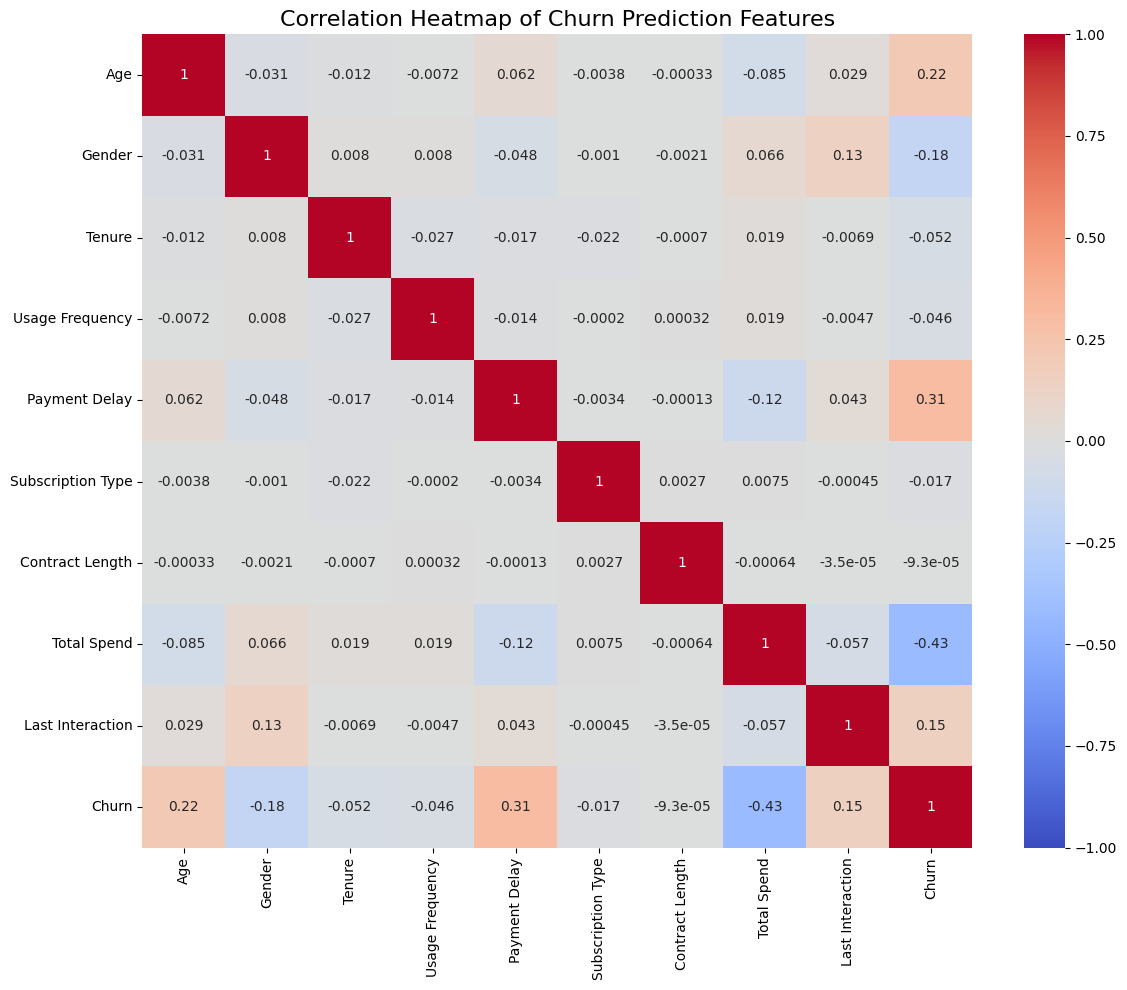

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Set the title
plt.title('Correlation Heatmap of Churn Prediction Features', fontsize=16)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Save the heatmap as an image file
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')


# Display the plot
plt.show()


# **score of features**

F1-Scores (ANOVA):
             Feature       F1-Score
0      Support Calls  216911.938445
1        Total Spend   99631.721502
2      Payment Delay   47583.534653
3                Age   22078.856215
4             Gender   13991.822434
5   Last Interaction   10093.907607
6             Tenure    1191.503459
7    Usage Frequency     938.889250
8  Subscription Type     130.158140
9    Contract Length       0.003803

Mutual Information Scores:
             Feature  Mutual Information
0        Total Spend            0.442315
1      Support Calls            0.249110
2    Contract Length            0.157007
3                Age            0.129974
4      Payment Delay            0.127100
5             Gender            0.056163
6  Subscription Type            0.020163
7   Last Interaction            0.015653
8             Tenure            0.003276
9    Usage Frequency            0.003087

Correlation Scores:
             Feature  Correlation
0      Support Calls     0.574267
1        Total Sp

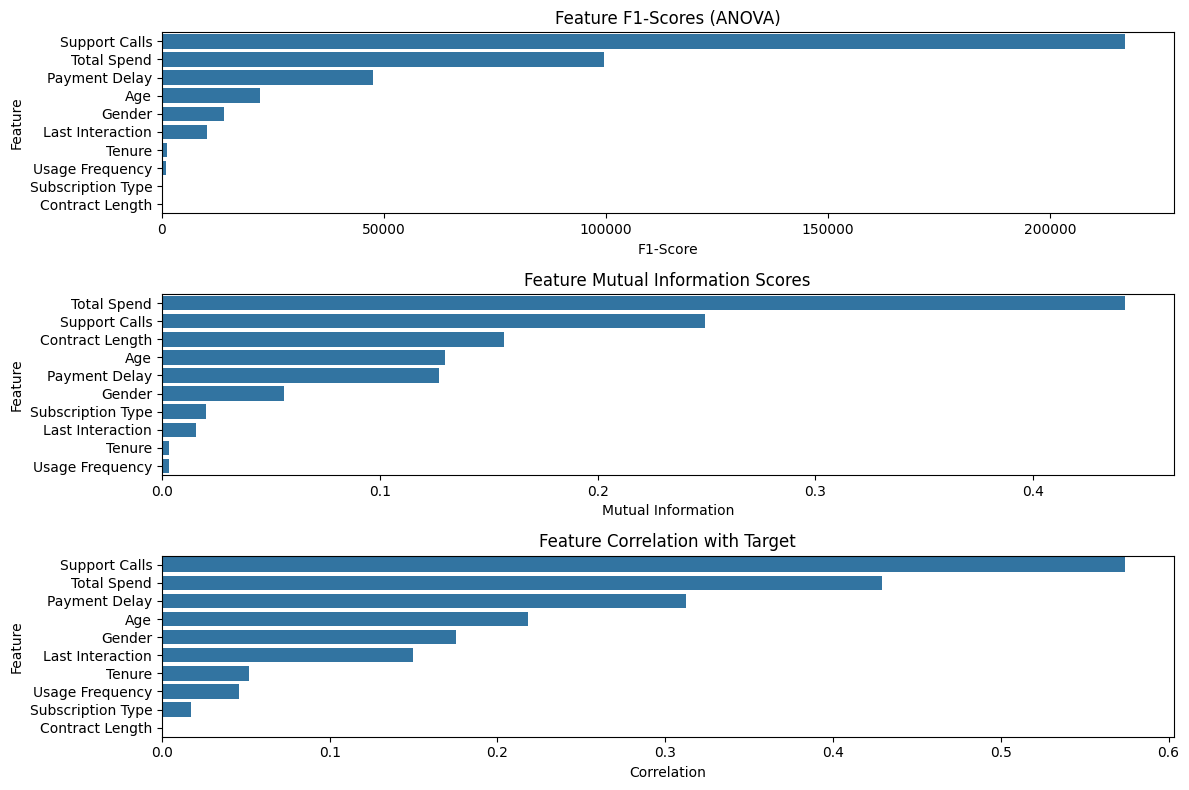


Combined Feature Scores and Rankings:
             Feature       F1-Score  Mutual Information  Correlation  \
0      Support Calls  216911.938445            0.249110     0.574267   
1        Total Spend   99631.721502            0.442315     0.429355   
2      Payment Delay   47583.534653            0.127100     0.312129   
3                Age   22078.856215            0.129974     0.218394   
4             Gender   13991.822434            0.056163     0.175395   
5   Last Interaction   10093.907607            0.015653     0.149616   
6             Tenure    1191.503459            0.003276     0.051919   
7    Contract Length       0.003803            0.157007     0.000093   
8  Subscription Type     130.158140            0.020163     0.017181   
9    Usage Frequency     938.889250            0.003087     0.046101   

   Average Rank  
0      1.333333  
1      1.666667  
2      3.666667  
3      4.000000  
4      5.333333  
5      6.666667  
6      7.666667  
7      7.666667  
8     

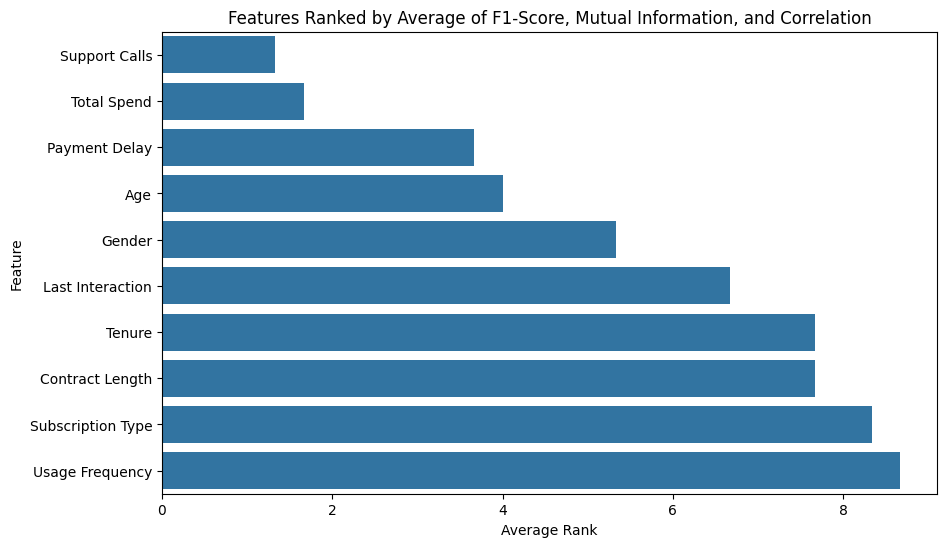

In [ ]:
#Score of features


# 1. Univariate Feature Selection (f_classif)
f1_scores, _ = f_classif(X, y)
f1_scores_df = pd.DataFrame({'Feature': X.columns, 'F1-Score': f1_scores})
f1_scores_df = f1_scores_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

# 2. Mutual Information
mi_scores = mutual_info_classif(X, y)
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})
mi_scores_df = mi_scores_df.sort_values('Mutual Information', ascending=False).reset_index(drop=True)

# 3. Correlation with target
corr_scores = X.apply(lambda x: x.corr(y) if x.dtype in ['int64', 'float64'] else np.nan)
corr_scores_df = pd.DataFrame({'Feature': X.columns, 'Correlation': corr_scores.abs()})
corr_scores_df = corr_scores_df.sort_values('Correlation', ascending=False).dropna().reset_index(drop=True)

# Print the results
print("F1-Scores (ANOVA):")
print(f1_scores_df)
print("\nMutual Information Scores:")
print(mi_scores_df)
print("\nCorrelation Scores:")
print(corr_scores_df)

# Visualize the results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.barplot(x='F1-Score', y='Feature', data=f1_scores_df)
plt.title('Feature F1-Scores (ANOVA)')

plt.subplot(3, 1, 2)
sns.barplot(x='Mutual Information', y='Feature', data=mi_scores_df)
plt.title('Feature Mutual Information Scores')

plt.subplot(3, 1, 3)
sns.barplot(x='Correlation', y='Feature', data=corr_scores_df)
plt.title('Feature Correlation with Target')

plt.tight_layout()
plt.show()

# Combine all scores
all_scores = f1_scores_df.merge(mi_scores_df, on='Feature').merge(corr_scores_df, on='Feature', how='left')
all_scores['Average Rank'] = all_scores.rank(ascending=False, method='average', numeric_only=True).mean(axis=1)
all_scores = all_scores.sort_values('Average Rank').reset_index(drop=True)

print("\nCombined Feature Scores and Rankings:")
print(all_scores)

# Visualize combined rankings
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Rank', y='Feature', data=all_scores)
plt.title('Features Ranked by Average of F1-Score, Mutual Information, and Correlation')
plt.show()

In [ ]:
df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Payment Delay',
       'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [ ]:
list_col=['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Payment Delay',
       'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn']


for col in list_col:
    print('{}: {}\n ' . format(col.upper(),df[col].unique()))

AGE: [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62.]
 
GENDER: [0 1]
 
TENURE: [39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36.]
 
USAGE FREQUENCY: [14.  1.  4. 21. 20. 25. 12.  8.  5.  9.  6. 17. 23. 13. 16. 27.  2. 28.
 29. 15. 24.  3. 22. 26. 30.  7. 11. 18. 19. 10.]
 
PAYMENT DELAY: [18.  8.  7. 26. 16. 15.  4. 11. 30. 25. 13. 22.  5. 14.  3. 10. 28.  2.
  6. 27. 12. 29. 17. 24.  9. 23. 21.  1.  0. 20. 19.]
 
SUBSCRIPTION TYPE: [2 0 1]
 
CONTRACT LENGTH: [0 1 2]
 
TOTAL SPEND: [932.   557.   185.   ... 829.59 804.3  959.47]
 
LAST INTERACTION: [17.  6.  3. 29. 20.  8. 24. 30. 13. 18. 19. 23.  4. 16. 10. 21. 22.  2.
 15. 28. 26.  7.  1.  9.  5. 1

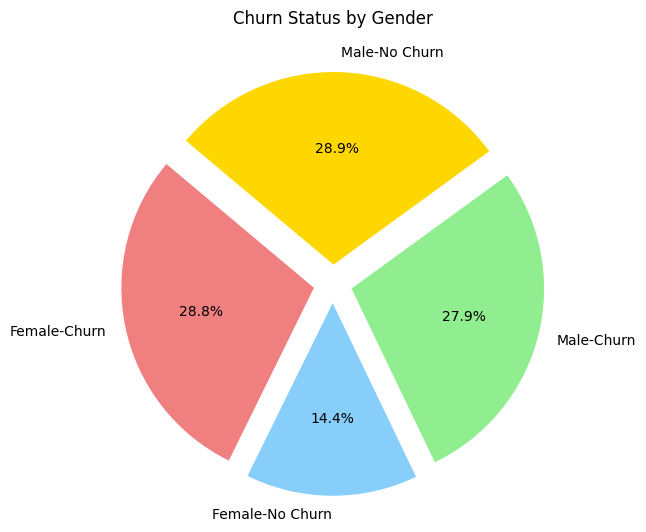

In [ ]:

# Calculate the counts for each category

# Filter data for female and male customers
female_data = df[df['Gender'] == 0]
male_data = df[df['Gender'] == 1]

# Filter data for female and male customers who churned
female_Churn_data = female_data[female_data['Churn'] == 1]
male_Churn_data = male_data[male_data['Churn'] == 1]

female_Churn_count = len(female_Churn_data)
female_not_Churn_count = len(female_data) - female_Churn_count
male_Churn_count = len(male_Churn_data)
male_not_Churn_count = len(male_data) - male_Churn_count

# Data to plot
labels = 'Female-Churn', 'Female-No Churn', 'Male-Churn', 'Male-No Churn'
sizes = [female_Churn_count, female_not_Churn_count, male_Churn_count, male_not_Churn_count]
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'gold']
explode = (0.1, 0.1, 0.1, 0.1)  # explode a slice if needed

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Churn Status by Gender\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [ ]:

#Normalization & Standarization


# Extract the 'Age, Tenure, Usage Frequency, Payment Delay, Total Spend, Last Interaction,Support Calls ' column
age_values = df['Age'].values.reshape(-1, 1)
Tenure_values = df['Tenure'].values.reshape(-1, 1)
UsageFrequency_values = df['Usage Frequency'].values.reshape(-1, 1)
PaymentDelay_values = df['Payment Delay'].values.reshape(-1, 1)
TotalSpend_values = df['Total Spend'].values.reshape(-1, 1)
LastInteraction_values = df['Last Interaction'].values.reshape(-1, 1)
#SupportCalls_values= df['Support Calls'].values.reshape(-1, 1)

# Min-Max Scaling (Normalization)
age_normalized = MinMaxScaler().fit_transform(age_values)
Tenure_normalized = MinMaxScaler().fit_transform(Tenure_values)
UsageFrequency_normalized = MinMaxScaler().fit_transform(UsageFrequency_values)
PaymentDelay_normalized = MinMaxScaler().fit_transform(PaymentDelay_values)
TotalSpend_normalized = MinMaxScaler().fit_transform(TotalSpend_values)
LastInteraction_normalized = MinMaxScaler().fit_transform(LastInteraction_values)
#SupportCalls_normalized = MinMaxScaler().fit_transform(SupportCalls_values)

# Standardization (Z-score Scaling)
age_standardized = StandardScaler().fit_transform(age_values)
Tenure_standardized = StandardScaler().fit_transform(Tenure_values)
UsageFrequency_standardized = StandardScaler().fit_transform(UsageFrequency_values)
PaymentDelay_standardized = StandardScaler().fit_transform(PaymentDelay_values)
TotalSpend_standardized = StandardScaler().fit_transform(TotalSpend_values)
LastInteraction_standardized = StandardScaler().fit_transform(LastInteraction_values)
#SupportCalls_standardized = StandardScaler().fit_transform(SupportCalls_values)

# Create new columns in the DataFrame for the scaled features
df['Age_Normalized'] = age_normalized
df['Tenure_Normalized'] = Tenure_normalized
df['UsageFrequency_Normalized'] = UsageFrequency_normalized
df['PaymentDelay_Normalized'] = PaymentDelay_normalized
df['TotalSpend_Normalized'] = TotalSpend_normalized
df['LastInteraction_Normalized'] = LastInteraction_normalized
#df['SupportCalls_Normalized'] = SupportCalls_normalized


df['Age_Standardized'] = age_standardized
df['Tenure_Standardized'] = Tenure_standardized
df['UsageFrequency_Standardized'] = UsageFrequency_standardized
df['PaymentDelay_Standardized'] = PaymentDelay_standardized
df['TotalSpend_Standardized'] = TotalSpend_standardized
df['LastInteraction_Standardized'] = LastInteraction_standardized
#df['SupportCalls_Standardized'] = SupportCalls_standardized


df.head()

,Age,Gender,Tenure,Usage Frequency,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,...,UsageFrequency_Normalized,PaymentDelay_Normalized,TotalSpend_Normalized,LastInteraction_Normalized,Age_Standardized,Tenure_Standardized,UsageFrequency_Standardized,PaymentDelay_Standardized,TotalSpend_Standardized,LastInteraction_Standardized
0,30.0,0,39.0,14.0,18.0,2,0,932.0,17.0,1.0,...,0.448276,0.600000,0.924444,0.551724,-0.753326,0.448760,-0.210511,0.609620,1.247427,0.293052
1,65.0,0,49.0,1.0,8.0,0,1,557.0,6.0,1.0,...,0.000000,0.266667,0.507778,0.172414,2.059646,1.028278,-1.724562,-0.601319,-0.309865,-0.986584
2,55.0,0,14.0,4.0,18.0,0,2,185.0,3.0,1.0,...,0.103448,0.600000,0.094444,0.068966,1.255940,-1.000036,-1.375166,0.609620,-1.854698,-1.335575
3,58.0,1,38.0,21.0,7.0,2,1,396.0,29.0,1.0,...,0.689655,0.233333,0.328889,0.965517,1.497051,0.390808,0.604748,-0.722413,-0.978462,1.689018
4,23.0,1,32.0,20.0,8.0,0,1,617.0,20.0,1.0,...,0.655172,0.266667,0.574444,0.655172,-1.315921,0.043097,0.488282,-0.601319,-0.060698,0.642043


In [ ]:

df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Payment Delay',
       'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn', 'Age_Normalized', 'Tenure_Normalized',
       'UsageFrequency_Normalized', 'PaymentDelay_Normalized',
       'TotalSpend_Normalized', 'LastInteraction_Normalized',
       'Age_Standardized', 'Tenure_Standardized',
       'UsageFrequency_Standardized', 'PaymentDelay_Standardized',
       'TotalSpend_Standardized', 'LastInteraction_Standardized'],
      dtype='object')

In [ ]:
list_col=['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Payment Delay',
       'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction',
       'Churn', 'Age_Normalized', 'Age_Standardized']


for col in list_col:
    print('{}: {} \n ' . format(col.upper(),df[col].unique()))

AGE: [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62.] 
 
GENDER: [0 1] 
 
TENURE: [39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36.] 
 
USAGE FREQUENCY: [14.  1.  4. 21. 20. 25. 12.  8.  5.  9.  6. 17. 23. 13. 16. 27.  2. 28.
 29. 15. 24.  3. 22. 26. 30.  7. 11. 18. 19. 10.] 
 
PAYMENT DELAY: [18.  8.  7. 26. 16. 15.  4. 11. 30. 25. 13. 22.  5. 14.  3. 10. 28.  2.
  6. 27. 12. 29. 17. 24.  9. 23. 21.  1.  0. 20. 19.] 
 
SUBSCRIPTION TYPE: [2 0 1] 
 
CONTRACT LENGTH: [0 1 2] 
 
TOTAL SPEND: [932.   557.   185.   ... 829.59 804.3  959.47] 
 
LAST INTERACTION: [17.  6.  3. 29. 20.  8. 24. 30. 13. 18. 19. 23.  4. 16. 10. 21. 22.  2.
 15. 28. 26.  7.  1.  

In [ ]:
def categorical_visualization(col):
    plt.subplot(1,2,1)
    sns.countplot(x=col,data=df)
    plt.subplot(1,2,2)
    df[col].value_counts().plot(kind='pie',autopct='%0.2f%%')
    plt.tight_layout()
    plt.show()


def numerical_visualization(col):
    plt.subplot(1,2,1)
    sns.kdeplot(x=col,data=df)
    plt.grid()
    plt.subplot(1,2,2)
    sns.boxplot(x=col,data=df)
    plt.tight_layout()
    plt.show()

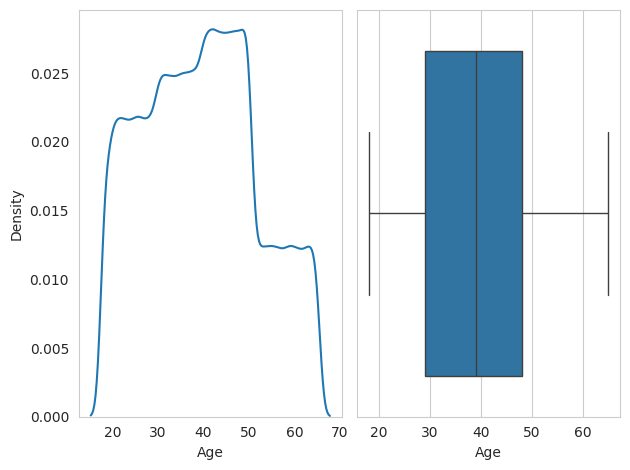

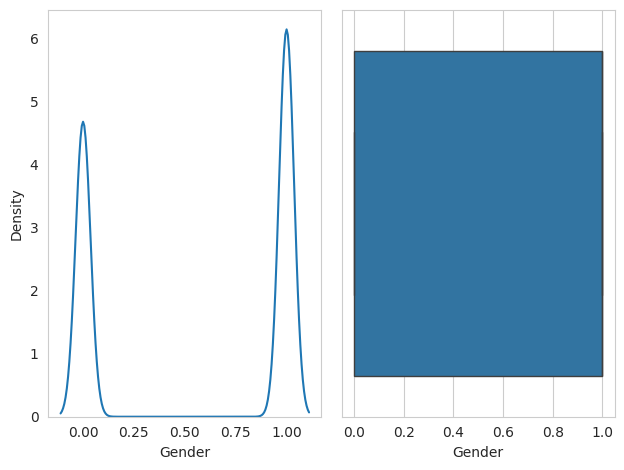

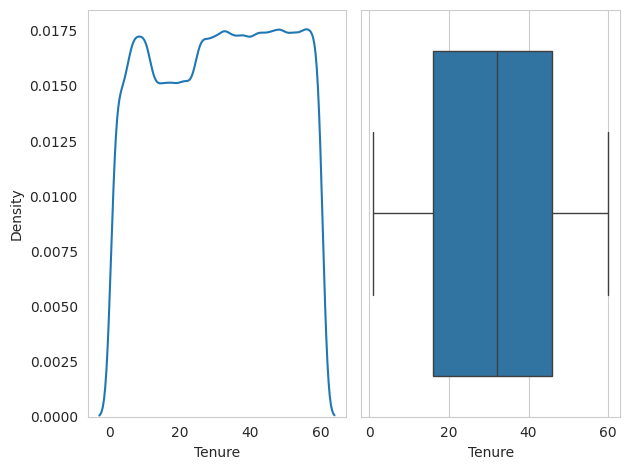

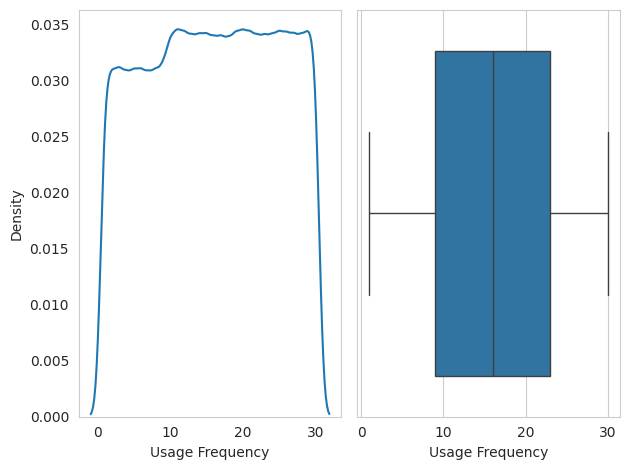

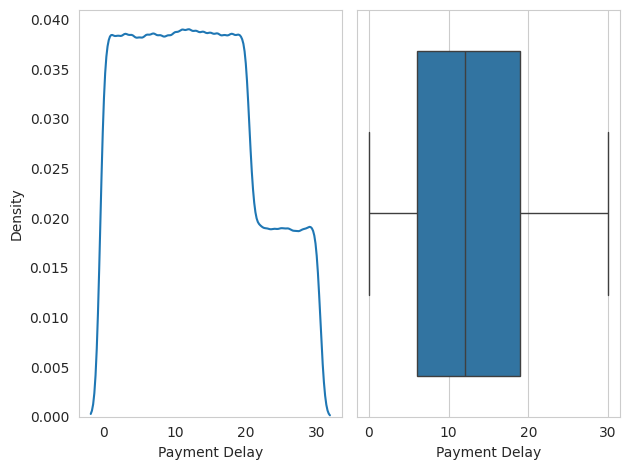

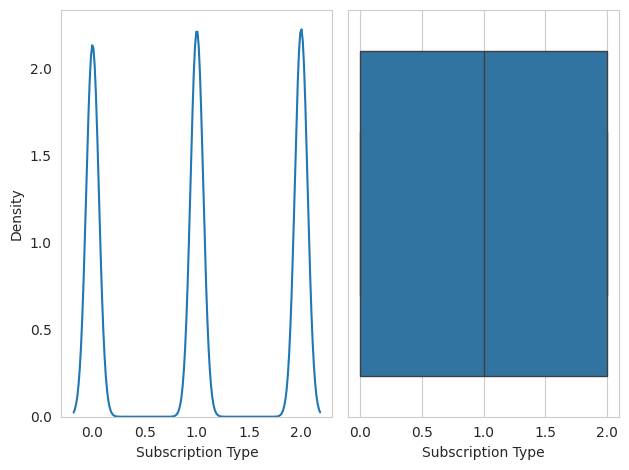

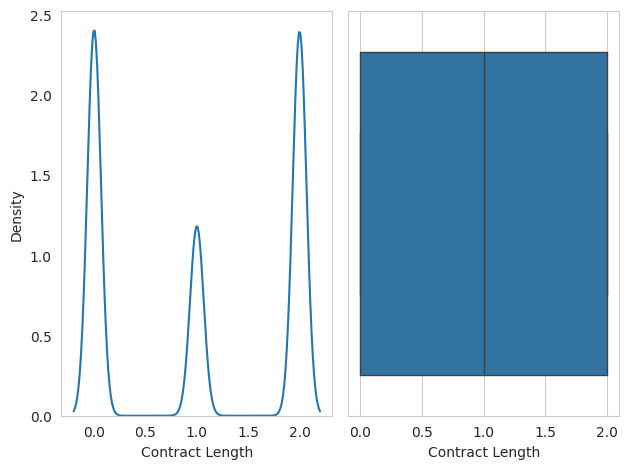

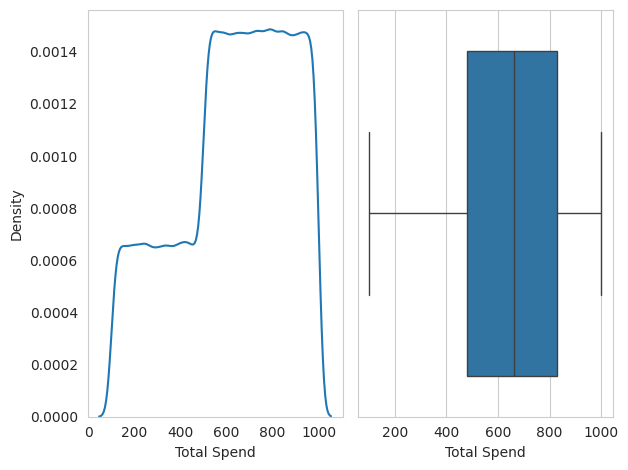

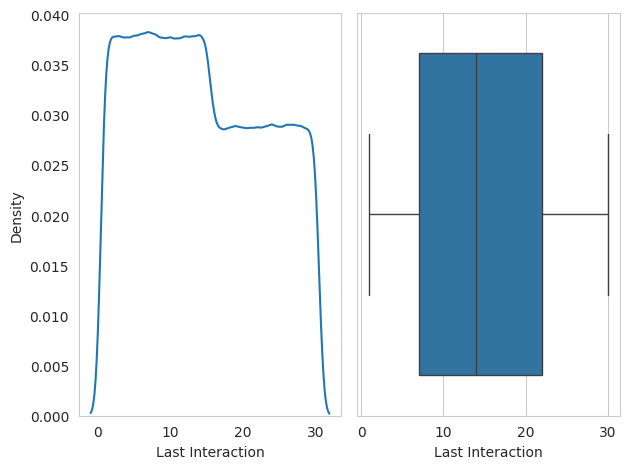

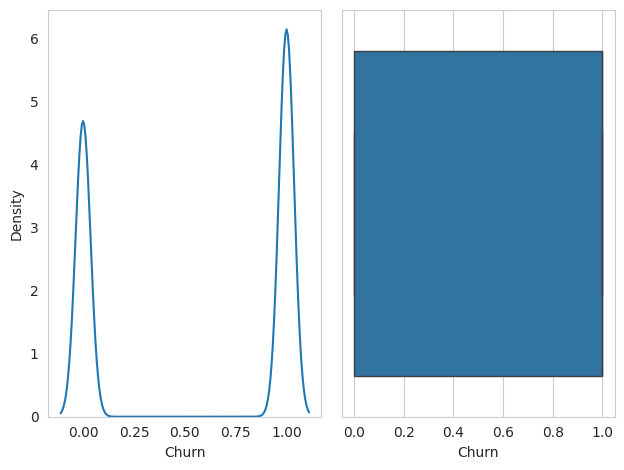

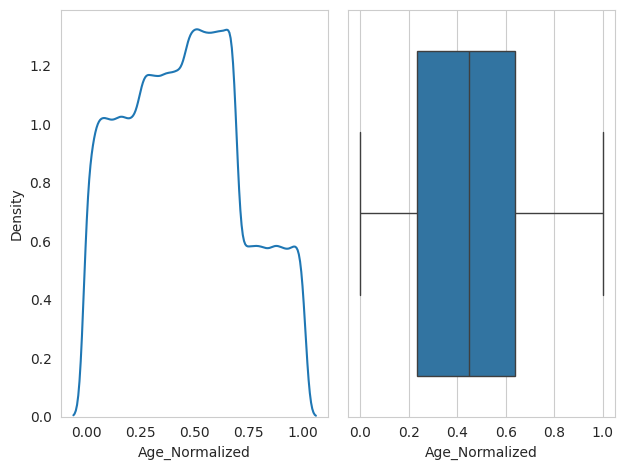

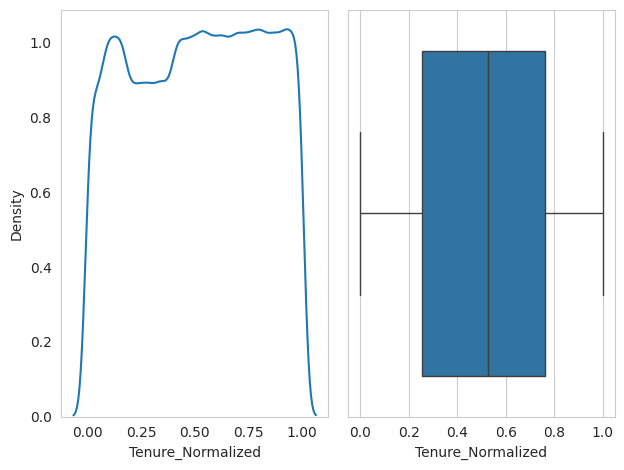

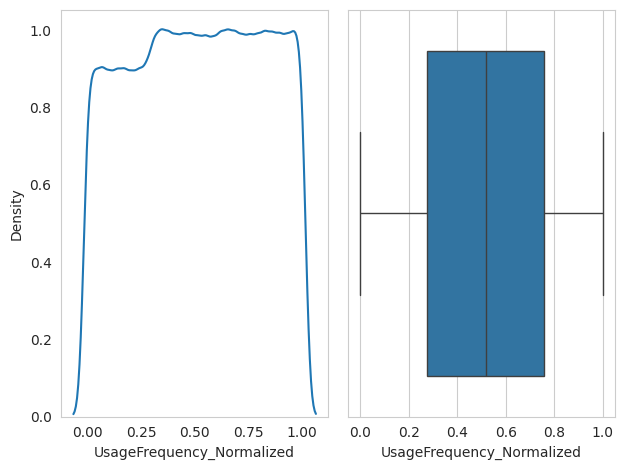

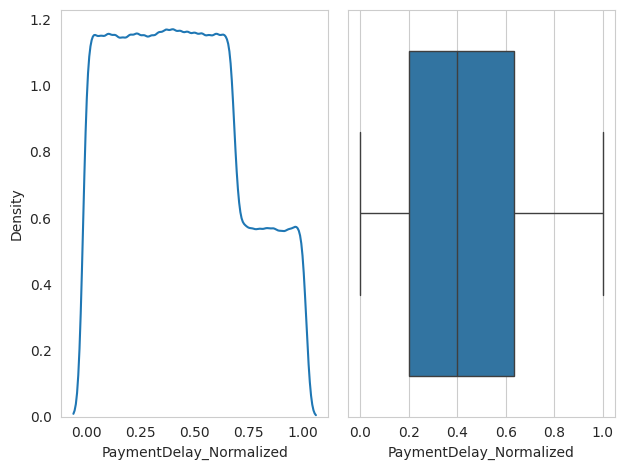

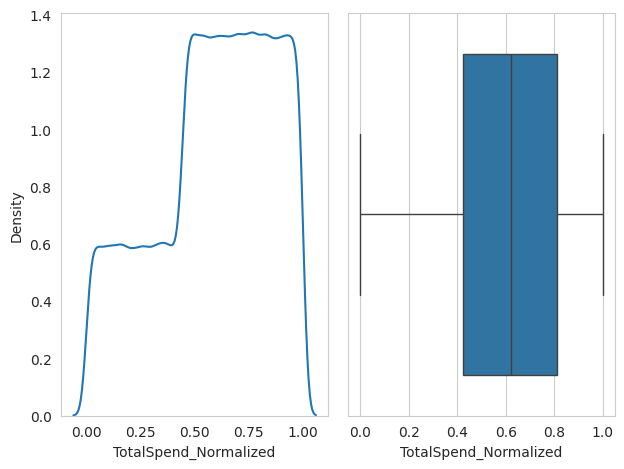

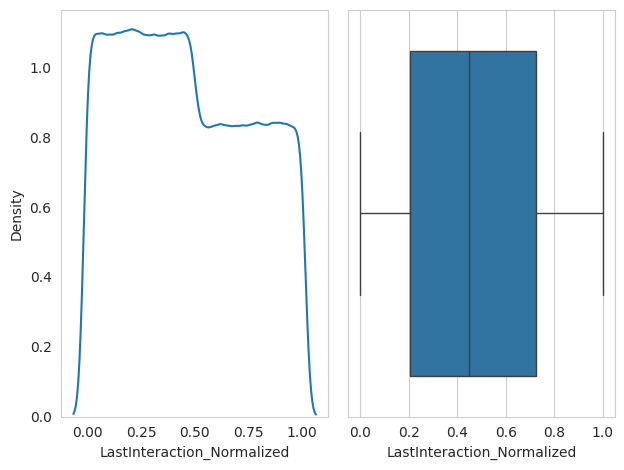

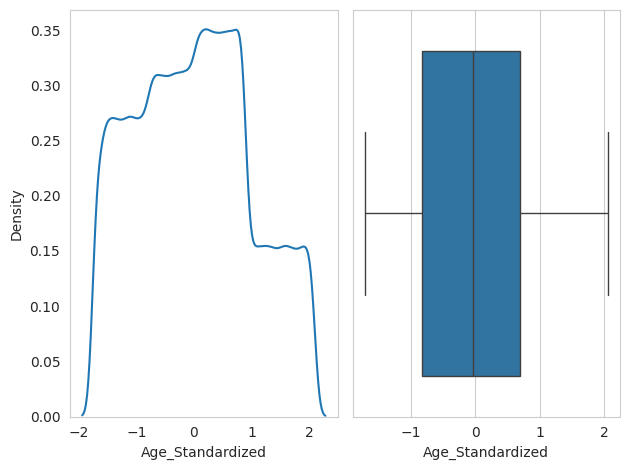

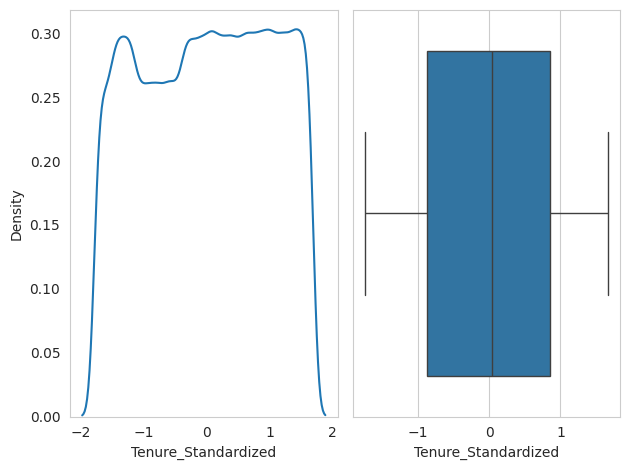

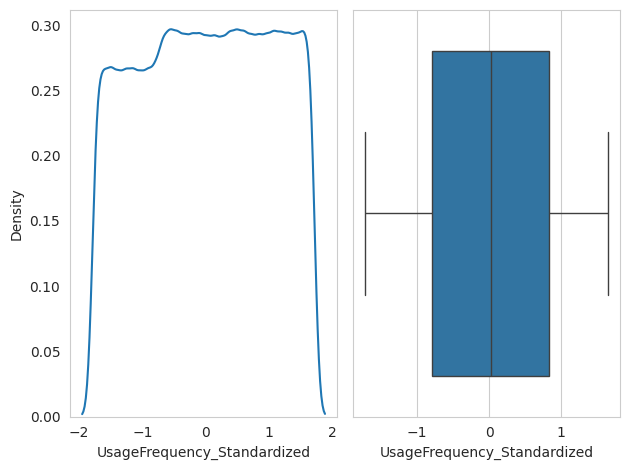

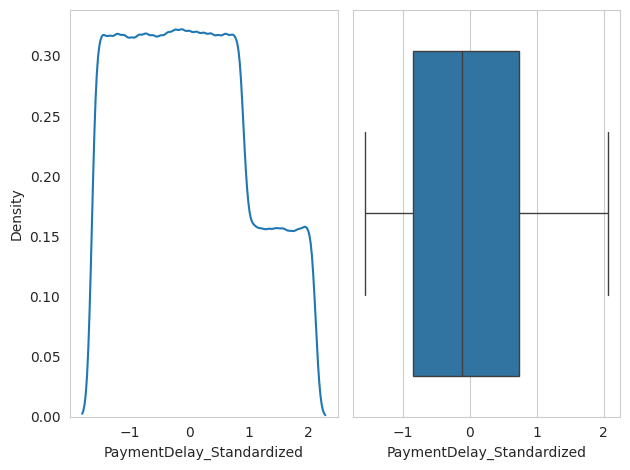

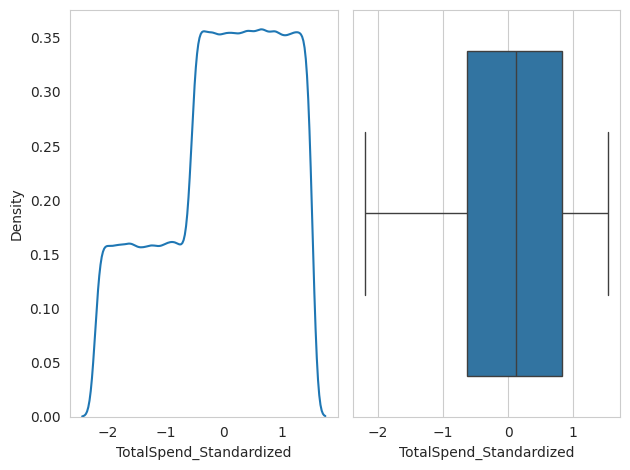

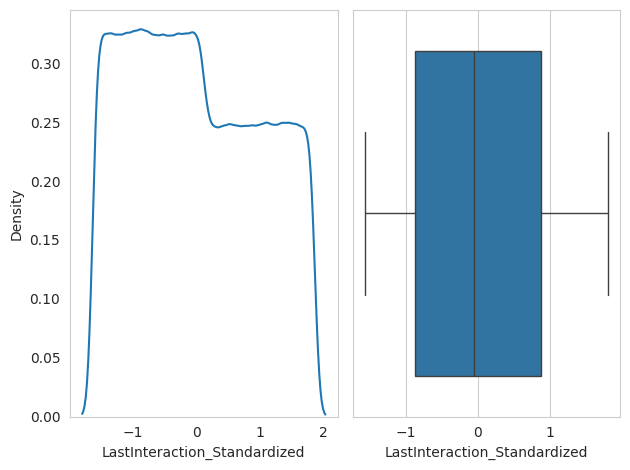

In [ ]:
for i in df.columns:
    if df[i].dtype=='object':
        categorical_visualization(i)
    else:
        numerical_visualization(i)

In [ ]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,...,UsageFrequency_Normalized,PaymentDelay_Normalized,TotalSpend_Normalized,LastInteraction_Normalized,Age_Standardized,Tenure_Standardized,UsageFrequency_Standardized,PaymentDelay_Standardized,TotalSpend_Standardized,LastInteraction_Standardized
0,30.0,0,39.0,14.0,18.0,2,0,932.0,17.0,1.0,...,0.448276,0.600000,0.924444,0.551724,-0.753326,0.448760,-0.210511,0.609620,1.247427,0.293052
1,65.0,0,49.0,1.0,8.0,0,1,557.0,6.0,1.0,...,0.000000,0.266667,0.507778,0.172414,2.059646,1.028278,-1.724562,-0.601319,-0.309865,-0.986584
2,55.0,0,14.0,4.0,18.0,0,2,185.0,3.0,1.0,...,0.103448,0.600000,0.094444,0.068966,1.255940,-1.000036,-1.375166,0.609620,-1.854698,-1.335575
3,58.0,1,38.0,21.0,7.0,2,1,396.0,29.0,1.0,...,0.689655,0.233333,0.328889,0.965517,1.497051,0.390808,0.604748,-0.722413,-0.978462,1.689018
4,23.0,1,32.0,20.0,8.0,0,1,617.0,20.0,1.0,...,0.655172,0.266667,0.574444,0.655172,-1.315921,0.043097,0.488282,-0.601319,-0.060698,0.642043


In [ ]:
df.to_csv('preprocessed_churn_data.csv', index=False)
print("Preprocessed data has been saved to 'preprocessed_churn_data.csv'")

Preprocessed data has been saved to 'preprocessed_churn_data.csv'


In [ ]:
# Check the distribution of the target variable
print(df['Churn'].value_counts(normalize=True))

# Separate majority and minority classes
churn = df[df['Churn'] == 1]
not_churn = df[df['Churn'] == 0]

# a. Undersampling the majority class (churn)
churn_undersampled = resample(churn,
                              replace=False,    # sample without replacement
                              n_samples=len(not_churn),     # match minority n
                              random_state=42)  # reproducible results

undersampled = pd.concat([not_churn, churn_undersampled])

# b. Oversampling the minority class (not_churn)
not_churn_oversampled = resample(not_churn,
                                 replace=True,     # sample with replacement
                                 n_samples=len(churn),    # match majority n
                                 random_state=42)  # reproducible results

oversampled = pd.concat([churn, not_churn_oversampled])

# c. SMOTE
X = df.drop('Churn', axis=1)
y = df['Churn']

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Print the new class distribution for each method
print("\nClass distributions after balancing:")
print("Original:", Counter(df['Churn']))
print("Undersampled:", Counter(undersampled['Churn']))
print("Oversampled:", Counter(oversampled['Churn']))
print("SMOTE:", Counter(y_smote))

# Function to evaluate model
def evaluate_model(X, y, model):
    scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    return scores.mean()

# Create model
rf = RandomForestClassifier(random_state=42)

# Evaluate on different datasets
print("\nModel performance (F1 Score) on different datasets:")
print("Original Data:",
      evaluate_model(df.drop('Churn', axis=1), df['Churn'], rf))

print("Undersampled Data:",
      evaluate_model(undersampled.drop('Churn', axis=1), undersampled['Churn'], rf))

print("Oversampled Data:",
      evaluate_model(oversampled.drop('Churn', axis=1), oversampled['Churn'], rf))

print("SMOTE Data:",
      evaluate_model(X_smote, y_smote, rf))

Churn
1.0    0.567107
0.0    0.432893
Name: proportion, dtype: float64

Class distributions after balancing:
Original: Counter({1.0: 249999, 0.0: 190833})
Undersampled: Counter({0.0: 190833, 1.0: 190833})
Oversampled: Counter({1.0: 249999, 0.0: 249999})
SMOTE: Counter({1.0: 249999, 0.0: 249999})

Model performance (F1 Score) on different datasets:
Original Data: 0.9997799554299771
Undersampled Data: 0.999646166142567
Oversampled Data: 0.9998099634521564
SMOTE Data: 0.986453022505253


# **Model Training**

In [ ]:


from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
#XGBClassifier(objective="binary:logistic", eval_metric="logloss")
key = ['KNeighborsClassifier','RandomForestClassifier', 'XGBClassifier', 'LinearSVC']
value = [ KNeighborsClassifier(n_neighbors = 29, weights ='uniform'), RandomForestClassifier(n_estimators=500, random_state=42),  XGBClassifier(objective="binary:logistic", eval_metric="logloss"), LinearSVC(random_state=42)]
models = dict(zip(key,value))
models

{'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=29),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=500, random_state=42),
 'XGBClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, random_state=None, ...),
 'LinearSVC': LinearSVC(random_state=42)}

In [ ]:

from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.1,
                                                   random_state = 101)

In [ ]:
#svm_linear = LinearSVC(random_state=42)
#svm_linear.fit(X_train, y_train)

# Make predictions on the test set
#y_pred = svm_linear.predict(X_test)

# Calculate the accuracy
#accuracy = accuracy_score(y_test, y_pred)
#print(f"Accuracy: {accuracy:.2f}")


### **K-Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
predicted =[]
model= KNeighborsClassifier(n_neighbors = 5, weights ='uniform')
model.fit(X_train,y_train)
predict = model.predict(X_test)
acc = accuracy_score(y_test, predict)
predicted.append(acc)
print(acc)

0.8350195082115961


In [ ]:
model= KNeighborsClassifier(n_neighbors = 7, weights ='uniform')
model.fit(X_train,y_train)
predict = model.predict(X_test)
acc = accuracy_score(y_test, predict)
predicted.append(acc)
print(acc)

0.8394655657381362


In [ ]:
model= KNeighborsClassifier(n_neighbors = 9, weights ='uniform')
model.fit(X_train,y_train)
predict = model.predict(X_test)
acc = accuracy_score(y_test, predict)
predicted.append(acc)
print(acc)

0.8447962979765902


In [ ]:
model= KNeighborsClassifier(n_neighbors = 13, weights ='uniform')
model.fit(X_train,y_train)
predict = model.predict(X_test)
acc = accuracy_score(y_test, predict)
predicted.append(acc)
print(acc)

0.8493557753379911


In [ ]:
model= KNeighborsClassifier(n_neighbors = 15, weights ='uniform')
model.fit(X_train,y_train)
predict = model.predict(X_test)
acc = accuracy_score(y_test, predict)
predicted.append(acc)
print(acc)

0.8497867707104618


In [ ]:
model= KNeighborsClassifier(n_neighbors = 17, weights ='uniform')
model.fit(X_train,y_train)
predict = model.predict(X_test)
acc = accuracy_score(y_test, predict)
predicted.append(acc)
print(acc)

0.8503765538517376


In [ ]:
model= KNeighborsClassifier(n_neighbors = 19, weights ='uniform')
model.fit(X_train,y_train)
predict = model.predict(X_test)
acc = accuracy_score(y_test, predict)
predicted.append(acc)
print(acc)

0.8505580255875147


In [ ]:
model= KNeighborsClassifier(n_neighbors = 23, weights ='uniform')
model.fit(X_train,y_train)
predict = model.predict(X_test)
acc = accuracy_score(y_test, predict)
predicted.append(acc)
print(acc)

0.8508529171581526


In [ ]:
model= KNeighborsClassifier(n_neighbors = 29, weights ='uniform')
model.fit(X_train,y_train)
predict = model.predict(X_test)
acc = accuracy_score(y_test, predict)
predicted.append(acc)
print(acc)

0.8509436530260412


In [ ]:
model= KNeighborsClassifier(n_neighbors = 31, weights ='uniform')
model.fit(X_train,y_train)
predict = model.predict(X_test)
acc = accuracy_score(y_test, predict)
predicted.append(acc)
print(acc)

0.8506260774884312


In [ ]:
model= KNeighborsClassifier(n_neighbors = 39, weights ='uniform')
model.fit(X_train,y_train)
predict = model.predict(X_test)
acc = accuracy_score(y_test, predict)
predicted.append(acc)
print(acc)

0.8497867707104618


In [ ]:
model= KNeighborsClassifier(n_neighbors = 49, weights ='uniform')
model.fit(X_train,y_train)
predict = model.predict(X_test)
acc = accuracy_score(y_test, predict)
predicted.append(acc)
print(acc)

0.8494691951728518


In [ ]:
model= KNeighborsClassifier(n_neighbors = 79, weights ='uniform')
model.fit(X_train,y_train)
predict = model.predict(X_test)
acc = accuracy_score(y_test, predict)
predicted.append(acc)
print(acc)

0.8471554305416932


### **Models**

In [ ]:

predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

KNeighborsClassifier 0.8509436530260412
RandomForestClassifier 0.9572860901914527
XGBClassifier 0.9569685146538427
LinearSVC 0.7556029398421196


<ipython-input-14-d97fb35594ea>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=accuracies, y=models, palette='viridis')  # Change the color palette


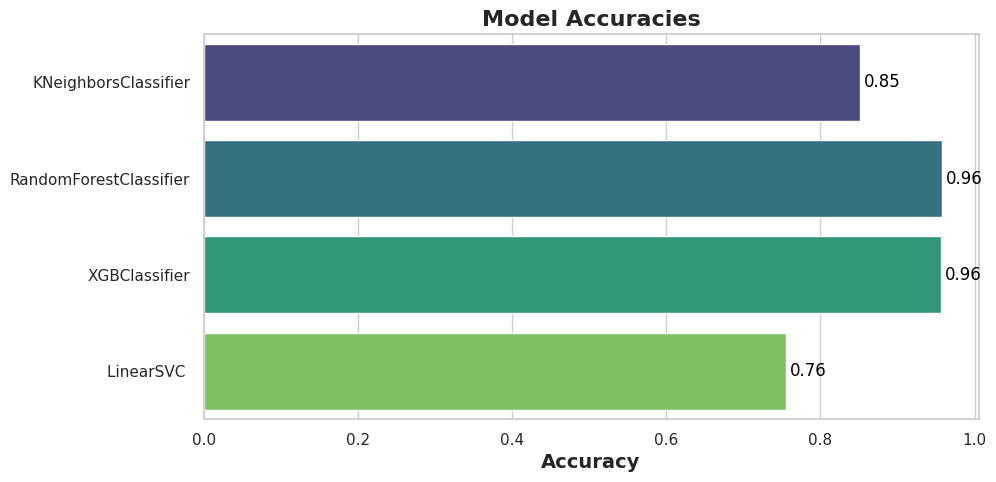

In [ ]:
# Model names and their accuracy scores
models = [ 'KNeighborsClassifier', 'RandomForestClassifier',  'XGBClassifier', 'LinearSVC ']
accuracies = [ 0.8509436530260412, 0.9572860901914527, 0.9569685146538427, 0.7556029398421196 ]

# Create a bar plot for accuracies with seaborn
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")  # Set a whitegrid background for better readability
ax = sns.barplot(x=accuracies, y=models, palette='viridis')  # Change the color palette

# Set the x-axis label to "Accuracy"
plt.xlabel("Accuracy", fontsize=14, fontweight="bold")

# Add labels to the bars with adjusted positioning
for i, v in enumerate(accuracies):
    ax.text(v + 0.005, i, f'{v:.2f}', color='black', va='center', fontsize=12)

# Set the title
plt.title("Model Accuracies", fontsize=16, fontweight="bold")

# Show the plot
plt.show()

In [ ]:

models = {

    'KNeighborsClassifier': KNeighborsClassifier(),

    'RandomForestClassifier': RandomForestClassifier(),

    'XGBClassifier' : XGBClassifier(),

    'LinearSVC' : LinearSVC()
}

# **inaccurate bias variance**

In [ ]:
def calculate_bias_variance(model, X, y, cv=5):
    # Compute cross-validated scores
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

    # Compute bias
    bias = 1 - np.mean(scores)

    # Compute variance
    variance = np.var(scores)

    return bias, variance
for name,algo in models.items():
    bias, variance = calculate_bias_variance(model, X_train, y_train)
    print(name)
    print(f"Average Bias: {bias:.4f}")
    print(f"Average Variance: {variance:.4f}")

KNeighborsClassifier
Average Bias: 0.2465
Average Variance: 0.0000
RandomForestClassifier
Average Bias: 0.2465
Average Variance: 0.0000
XGBClassifier
Average Bias: 0.2465
Average Variance: 0.0000
LinearSVC
Average Bias: 0.2465
Average Variance: 0.0000


In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score

# Initialize a dictionary to store metrics
metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)



    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)




    # Store metrics in the dictionary
    metrics[name] = {

        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display the results
for model_name, metric_values in metrics.items():
     print(f" Precision: {metric_values['Precision']:.2f}, Recall: {metric_values['Recall']:.2f}, F1 Score: {metric_values['F1 Score']:.2f}")



 Precision: 0.91, Recall: 0.79, F1 Score: 0.84
 Precision: 1.00, Recall: 0.92, F1 Score: 0.96
 Precision: 1.00, Recall: 0.92, F1 Score: 0.96
 Precision: 0.79, Recall: 0.78, F1 Score: 0.78


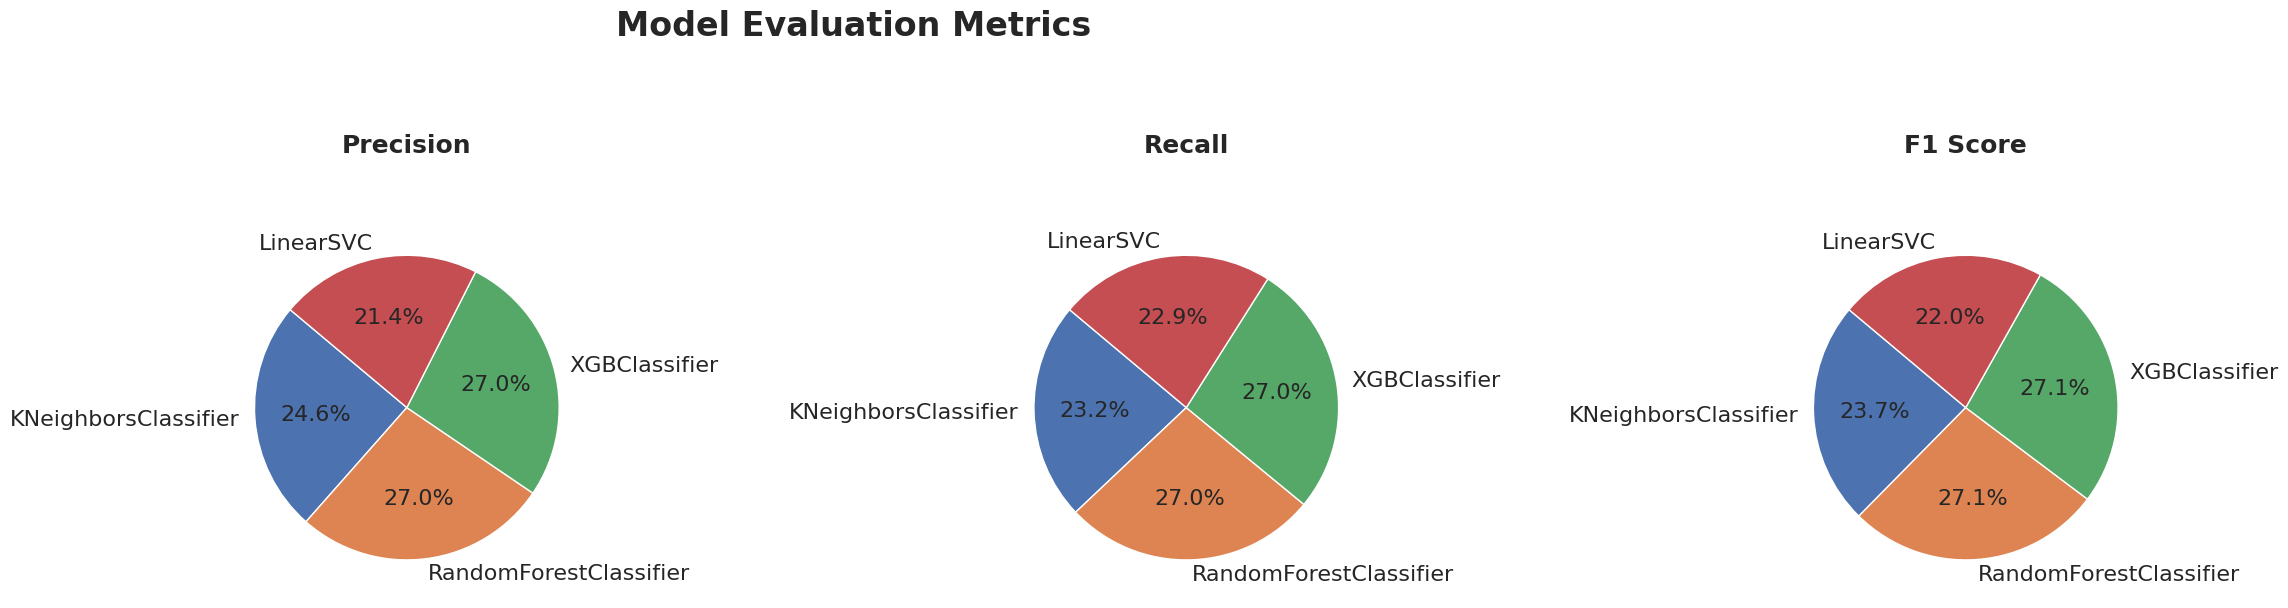

In [ ]:

# Model names and their  precision, recall, and F1 score
models = ['KNeighborsClassifier', 'RandomForestClassifier',  'XGBClassifier', 'LinearSVC']

precision = [ 0.91, 1.00, 1.00, 0.79]
recall = [ 0.79,  0.92, 0.92, 0.78]
f1_score = [ 0.84,  0.96, 0.96, 0.78]

# Create a larger figure with subplots for accuracy, precision, recall, and F1 score
plt.figure(figsize=(30, 8))



# Plot Precision
plt.subplot(142)
plt.pie(precision, labels=models, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 16})
plt.title('Precision\n\n', fontsize=18, fontweight="bold" )

# Plot Recall
plt.subplot(143)
plt.pie(recall, labels=models, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 16})
plt.title('Recall\n\n', fontsize=18, fontweight="bold")

# Plot F1 score
plt.subplot(144)
plt.pie(f1_score, labels=models, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 16})
plt.title('F1 Score\n\n', fontsize=18, fontweight="bold")

# Adjust layout
plt.tight_layout(pad=5.0)

# Adding titles and percentages
plt.suptitle("Model Evaluation Metrics", fontsize=24, fontweight="bold")
plt.show()

Text(41.25, 0.5, 'Actual')

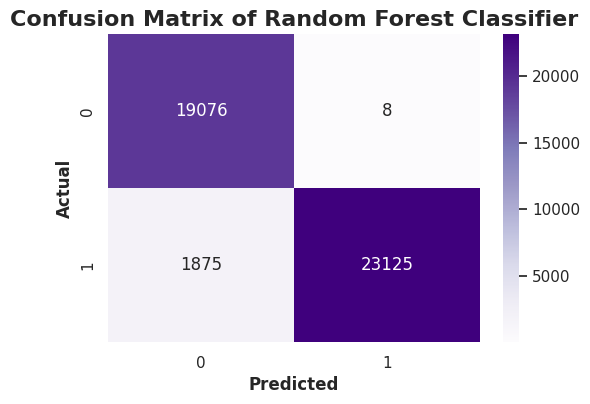

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix of Random Forest Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

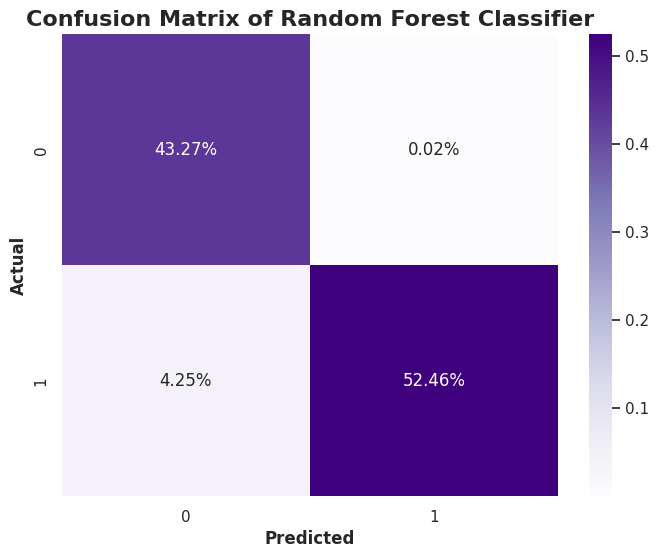

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))  # Set the figsize according to your preference
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Random Forest Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)
plt.show()

In [ ]:
models = {

    'KNeighborsClassifier': KNeighborsClassifier(),

    'RandomForestClassifier': RandomForestClassifier(),

    'XGBClassifier' : XGBClassifier(),
    'LinearSVC' : LinearSVC()
}

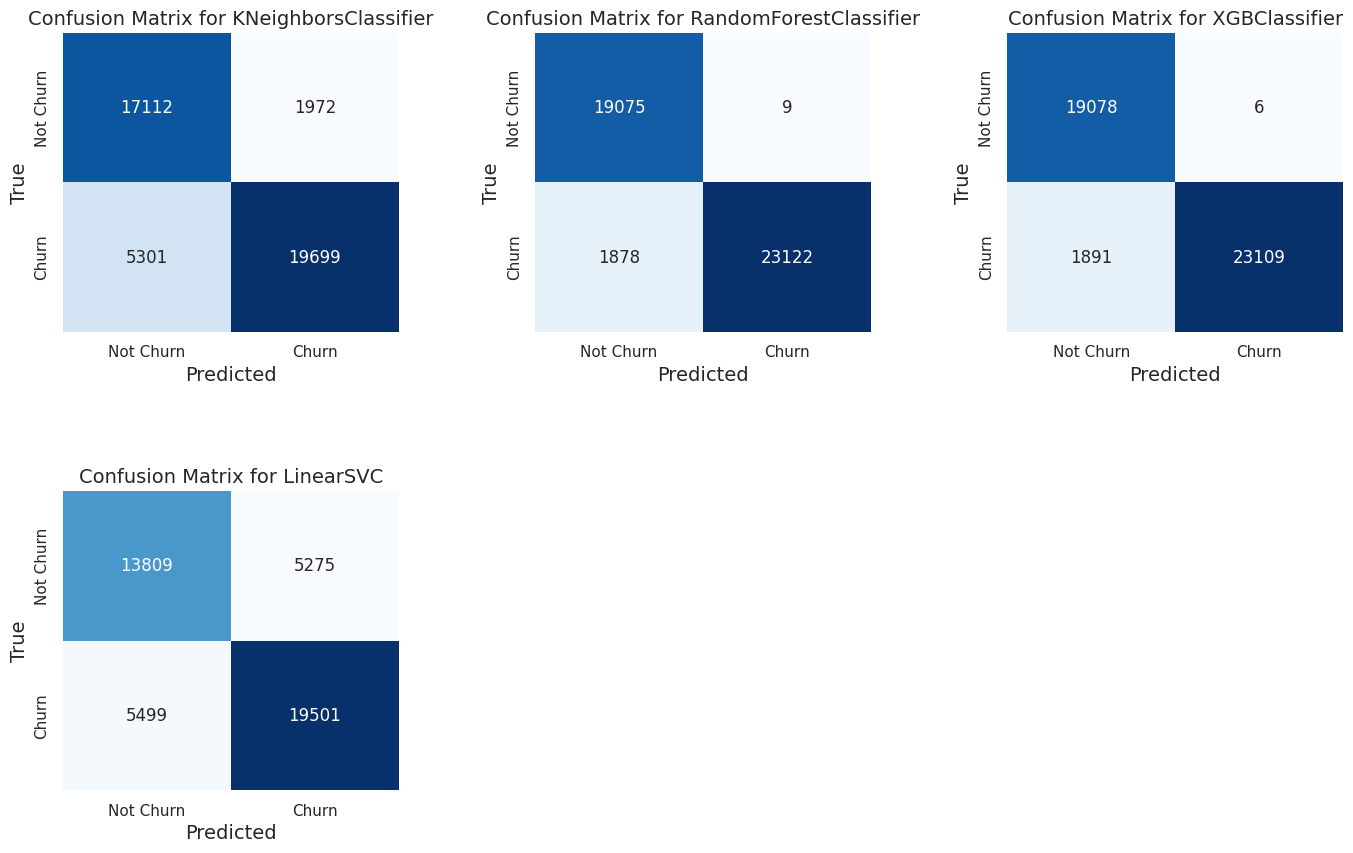

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a list to store confusion matrices
confusion_matrices = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Add the confusion matrix to the list
    confusion_matrices.append((name, cm))

# Plot the confusion matrices
plt.figure(figsize=(15, 10))

for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.title(f'Confusion Matrix for {model_name}', fontsize=14)  # Adjust font size
    plt.xlabel(f'Predicted', fontsize=14)
    plt.ylabel(f'True', fontsize=14)

# Adjust spacing
plt.tight_layout(pad=5.0)
plt.show()

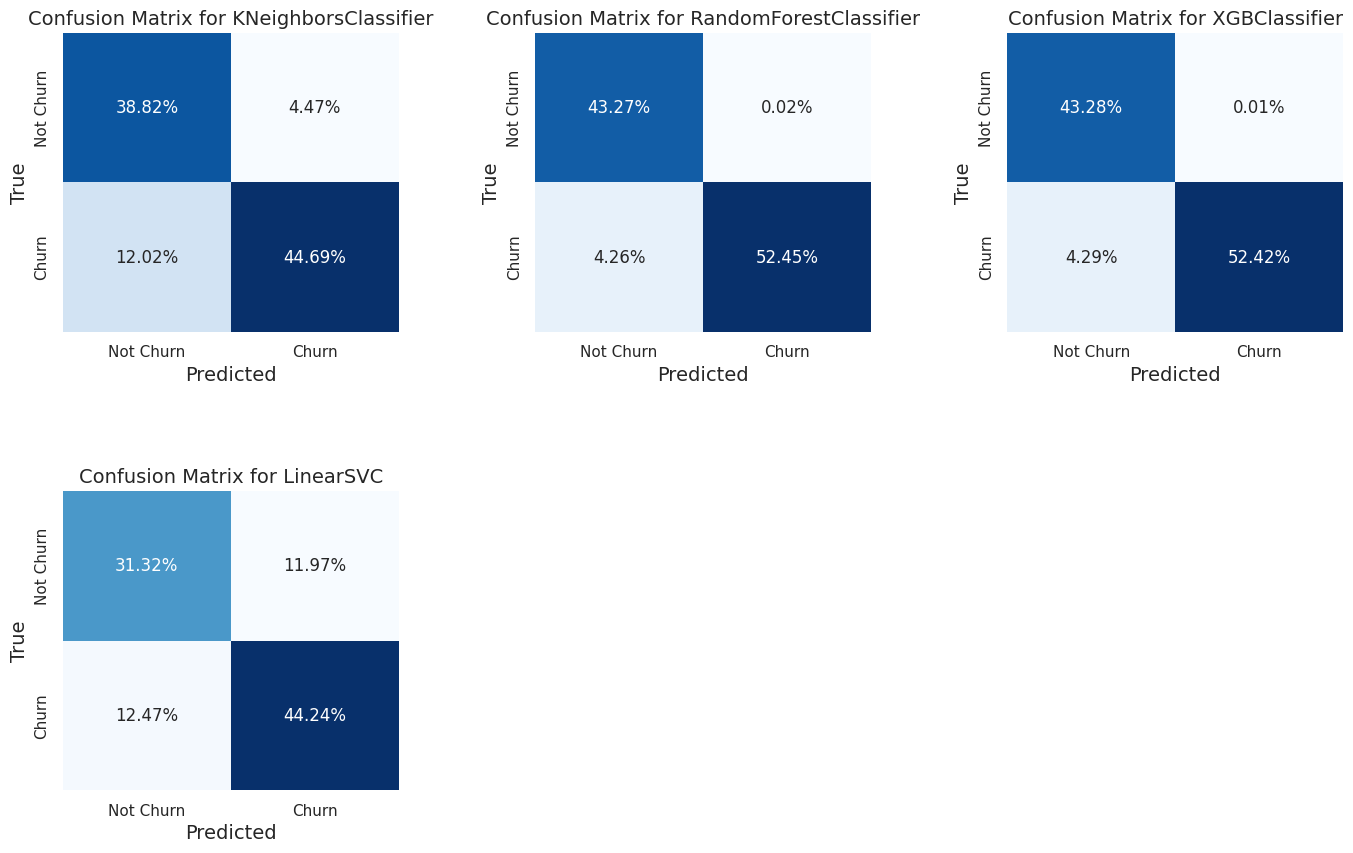

In [ ]:



# Plot the confusion matrices
plt.figure(figsize=(15, 10))

for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(2, 3, i)
    sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues', cbar=False, xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.title(f'Confusion Matrix for {model_name}', fontsize=14)  # Adjust font size
    plt.xlabel(f'Predicted', fontsize=14)
    plt.ylabel(f'True', fontsize=14)

# Adjust spacing
plt.tight_layout(pad=5.0)
plt.show()

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

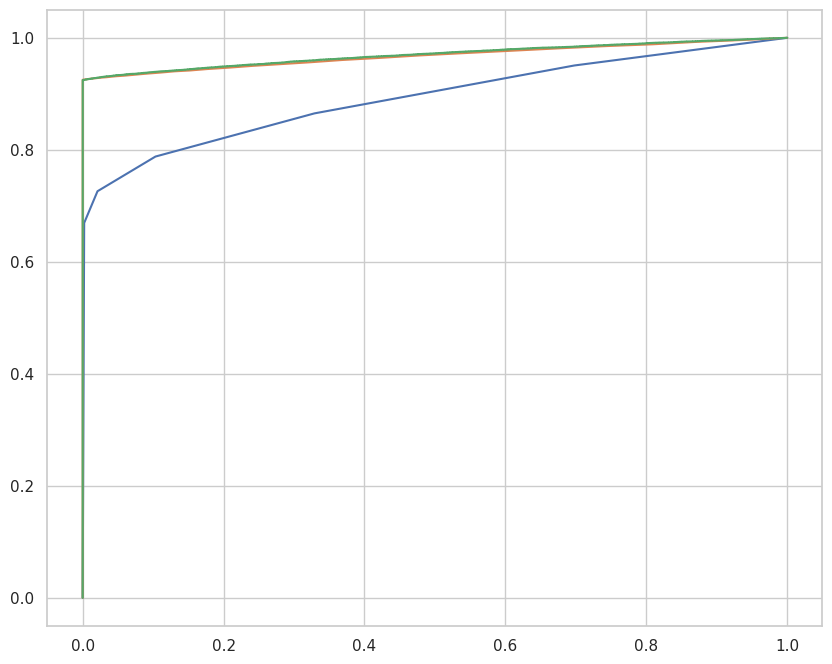

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc # Import roc_curve and auc
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))

# Loop through classifiers
for name, clf in models.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict probabilities
    if name == 'LinearSVC':
        y_pred = clf.predict_proba(X_test)[:, 1]
    else:
        y_pred = clf.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Finish the plot
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("ROC curves have been plotted for all classifiers.")

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc # Import roc_curve and auc
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rfc = RandomForestClassifier(random_state=20)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_rfc)
plt.figure(figsize=(8,8))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve (Random Forest Classifier)', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, pred_rfc)

# **K-Fold Validation**

### **Random Forest Classifier**

**5-Fold Cross-Validation**

# **cross validation with bias variance**

Random Forest Classifier
5-Fold Cross-Validation Results:
Accuracy for each fold: [0.95616274 0.95527805 0.95609419 0.95528889 0.95490325]
Mean Accuracy: 0.9555
Standard Deviation: 0.0005


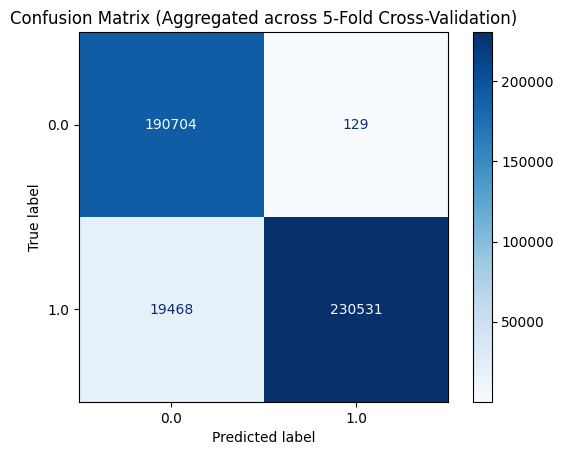

Confusion Matrix (Aggregated across 5-Fold Cross-Validation):
[[190704    129]
 [ 19468 230531]]

Bias-Variance Decomposition:
Bias: 0.3789
Variance: 0.0837

Overall Accuracy: 0.9555


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already defined
# Define the RandomForestClassifier model
model = RandomForestClassifier(random_state=20)

# Perform 5-Fold Cross-Validation
kfold_5 = KFold(n_splits=5, shuffle=True, random_state=20)
cv_results_5 = cross_val_score(model, X, y, cv=kfold_5, scoring='accuracy')

# Initialize lists to store true and predicted values
y_true_all = []
y_pred_all = []

# Initialize array to store predictions for bias-variance calculation
predictions = np.zeros((len(y), 5))

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kfold_5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Append true and predicted values for this fold
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    # Store predictions for bias-variance calculation
    predictions[test_index, fold] = y_pred

print("Random Forest Classifier")
print("5-Fold Cross-Validation Results:")
print(f"Accuracy for each fold: {cv_results_5}")
print(f"Mean Accuracy: {cv_results_5.mean():.4f}")
print(f"Standard Deviation: {cv_results_5.std():.4f}")

# Compute the confusion matrix using aggregated true and predicted values
conf_matrix = confusion_matrix(y_true_all, y_pred_all)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Aggregated across 5-Fold Cross-Validation)")
plt.show()

print("Confusion Matrix (Aggregated across 5-Fold Cross-Validation):")
print(conf_matrix)

# Bias-Variance Calculation
def calculate_bias_variance(y_true, predictions):
    y_true = np.array(y_true)

    # Calculate expected predictions
    expected_predictions = np.mean(predictions, axis=1)

    # Calculate bias
    bias = np.mean((expected_predictions - y_true) ** 2)

    # Calculate variance
    variance = np.mean(np.var(predictions, axis=1))

    return bias, variance

# Calculate bias and variance
bias, variance = calculate_bias_variance(y, predictions)

print("\nBias-Variance Decomposition:")
print(f"Bias: {bias:.4f}")
print(f"Variance: {variance:.4f}")

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_true_all, y_pred_all)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

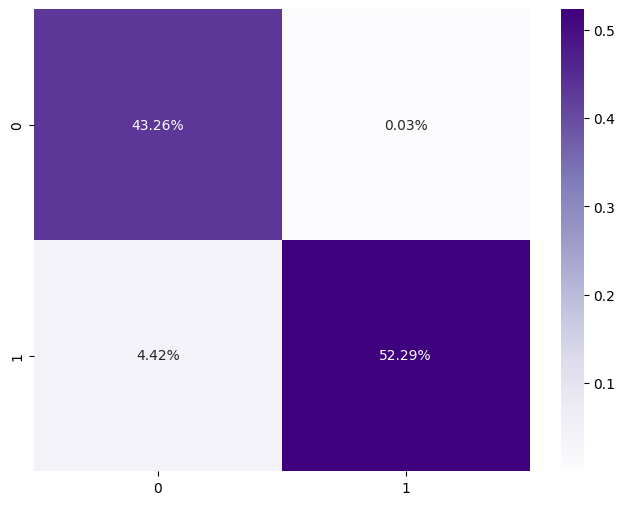

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figsize according to your preference
sns.heatmap(conf_matrix / np.sum(conf_matrix), annot=True,
            fmt='.2%', cmap='Purples')
plt.show()

**10-Fold Cross-Validation**

Random Forest Classifier
5-Fold Cross-Validation Results:
Accuracy for each fold: [0.95678704 0.95574358 0.95501667 0.95524352 0.9568768  0.95537962
 0.95508473 0.95574258 0.95587868 0.95392782]
Mean Accuracy: 0.9556
Standard Deviation: 0.0008


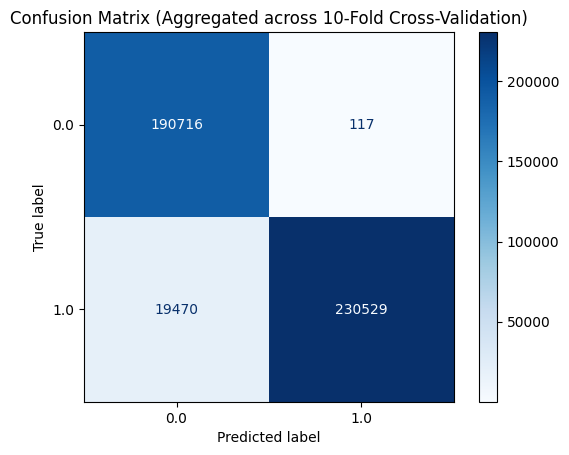

Confusion Matrix (Aggregated across 10-Fold Cross-Validation):
[[190716    117]
 [ 19470 230529]]

Bias-Variance Decomposition:
Bias: 0.4678
Variance: 0.0471

Overall Accuracy: 0.9556


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already defined
# Define the RandomForestClassifier model
model = RandomForestClassifier(random_state=20)

# Perform 10-Fold Cross-Validation
kfold_10 = KFold(n_splits=10, shuffle=True, random_state=20)
cv_results_10 = cross_val_score(model, X, y, cv=kfold_10, scoring='accuracy')

# Initialize lists to store true and predicted values
y_true_all = []
y_pred_all = []

# Initialize array to store predictions for bias-variance calculation
predictions = np.zeros((len(y), 10))

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kfold_10.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Append true and predicted values for this fold
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    # Store predictions for bias-variance calculation
    predictions[test_index, fold] = y_pred

print("Random Forest Classifier")
print("10-Fold Cross-Validation Results:")
print(f"Accuracy for each fold: {cv_results_10}")
print(f"Mean Accuracy: {cv_results_10.mean():.4f}")
print(f"Standard Deviation: {cv_results_10.std():.4f}")

# Compute the confusion matrix using aggregated true and predicted values
conf_matrix = confusion_matrix(y_true_all, y_pred_all)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Aggregated across 10-Fold Cross-Validation)")
plt.show()

print("Confusion Matrix (Aggregated across 10-Fold Cross-Validation):")
print(conf_matrix)

# Bias-Variance Calculation
def calculate_bias_variance(y_true, predictions):
    y_true = np.array(y_true)

    # Calculate expected predictions
    expected_predictions = np.mean(predictions, axis=1)

    # Calculate bias
    bias = np.mean((expected_predictions - y_true) ** 2)

    # Calculate variance
    variance = np.mean(np.var(predictions, axis=1))

    return bias, variance

# Calculate bias and variance
bias, variance = calculate_bias_variance(y, predictions)

print("\nBias-Variance Decomposition:")
print(f"Bias: {bias:.4f}")
print(f"Variance: {variance:.4f}")

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_true_all, y_pred_all)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

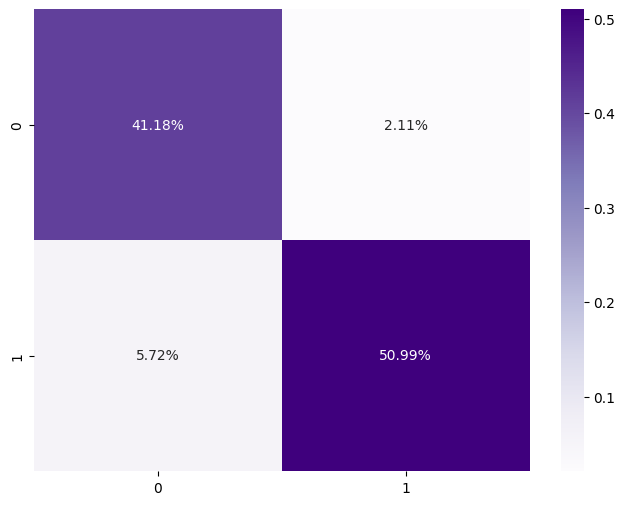

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figsize according to your preference
sns.heatmap(conf_matrix / np.sum(conf_matrix), annot=True,
            fmt='.2%', cmap='Purples')
plt.show()

### **XGBClassifier**

# **XG Boost 5 fold with bias variance**

XGBoost Classifier
5-Fold Cross-Validation Results:
Accuracy for each fold: [0.99993195 0.99997732 0.99994329 0.99998866 0.99997732]
Mean Accuracy: 1.0000
Standard Deviation: 0.0000


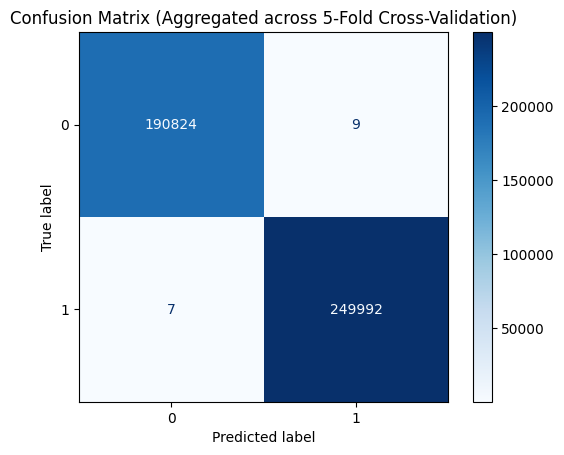

Confusion Matrix (Aggregated across 5-Fold Cross-Validation):
[[190824      9]
 [     7 249992]]

Bias-Variance Decomposition:
Bias: 0.3630
Variance: 0.0907

Overall Accuracy: 1.0000


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already defined
# Define the XGBClassifier model
model = XGBClassifier(objective="binary:logistic", eval_metric="logloss")

# Perform 5-Fold Cross-Validation
kfold_5 = KFold(n_splits=5, shuffle=True, random_state=20)
cv_results_5 = cross_val_score(model, X, y, cv=kfold_5, scoring='accuracy')

# Initialize lists to store true and predicted values
y_true_all = []
y_pred_all = []

# Initialize array to store predictions for bias-variance calculation
predictions = np.zeros((len(y), 5))

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kfold_5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Append true and predicted values for this fold
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    # Store predictions for bias-variance calculation
    predictions[test_index, fold] = y_pred

print("XGBoost Classifier")
print("5-Fold Cross-Validation Results:")
print(f"Accuracy for each fold: {cv_results_5}")
print(f"Mean Accuracy: {cv_results_5.mean():.4f}")
print(f"Standard Deviation: {cv_results_5.std():.4f}")

# Compute the confusion matrix using aggregated true and predicted values
conf_matrix = confusion_matrix(y_true_all, y_pred_all)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Aggregated across 5-Fold Cross-Validation)")
plt.show()

print("Confusion Matrix (Aggregated across 5-Fold Cross-Validation):")
print(conf_matrix)

# Bias-Variance Calculation
def calculate_bias_variance(y_true, predictions):
    y_true = np.array(y_true)

    # Calculate expected predictions
    expected_predictions = np.mean(predictions, axis=1)

    # Calculate bias
    bias = np.mean((expected_predictions - y_true) ** 2)

    # Calculate variance
    variance = np.mean(np.var(predictions, axis=1))

    return bias, variance

# Calculate bias and variance
bias, variance = calculate_bias_variance(y, predictions)

print("\nBias-Variance Decomposition:")
print(f"Bias: {bias:.4f}")
print(f"Variance: {variance:.4f}")

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_true_all, y_pred_all)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

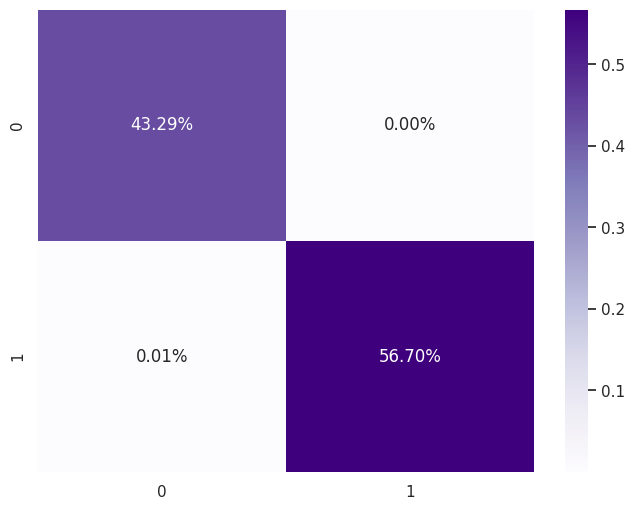

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figsize according to your preference
sns.heatmap(conf_matrix / np.sum(conf_matrix), annot=True,
            fmt='.2%', cmap='Purples')
plt.show()

**10 fold XG Boost with bias variance**

XGBoost Classifier
10-Fold Cross-Validation Results:
Accuracy for each fold: [0.99995463 0.99997732 0.99995463 0.99997732 1.         0.99997732
 0.99997732 1.         0.99997732 0.99993195]
Mean Accuracy: 1.0000
Standard Deviation: 0.0000


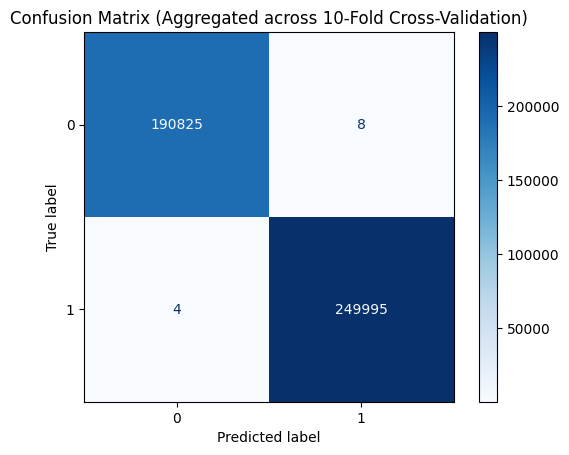

Confusion Matrix (Aggregated across 10-Fold Cross-Validation):
[[190825      8]
 [     4 249995]]

Bias-Variance Decomposition:
Bias: 0.4594
Variance: 0.0510

Overall Accuracy: 1.0000


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already defined
# Define the XGBClassifier model
model = XGBClassifier(objective="binary:logistic", eval_metric="logloss")

# Perform 10-Fold Cross-Validation
kfold_10 = KFold(n_splits=10, shuffle=True, random_state=20)
cv_results_10 = cross_val_score(model, X, y, cv=kfold_10, scoring='accuracy')

# Initialize lists to store true and predicted values
y_true_all = []
y_pred_all = []

# Initialize array to store predictions for bias-variance calculation
predictions = np.zeros((len(y), 10))

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kfold_10.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Append true and predicted values for this fold
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    # Store predictions for bias-variance calculation
    predictions[test_index, fold] = y_pred

print("XGBoost Classifier")
print("10-Fold Cross-Validation Results:")
print(f"Accuracy for each fold: {cv_results_10}")
print(f"Mean Accuracy: {cv_results_10.mean():.4f}")
print(f"Standard Deviation: {cv_results_10.std():.4f}")

# Compute the confusion matrix using aggregated true and predicted values
conf_matrix = confusion_matrix(y_true_all, y_pred_all)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Aggregated across 10-Fold Cross-Validation)")
plt.show()

print("Confusion Matrix (Aggregated across 10-Fold Cross-Validation):")
print(conf_matrix)

# Bias-Variance Calculation
def calculate_bias_variance(y_true, predictions):
    y_true = np.array(y_true)

    # Calculate expected predictions
    expected_predictions = np.mean(predictions, axis=1)

    # Calculate bias
    bias = np.mean((expected_predictions - y_true) ** 2)

    # Calculate variance
    variance = np.mean(np.var(predictions, axis=1))

    return bias, variance

# Calculate bias and variance
bias, variance = calculate_bias_variance(y, predictions)

print("\nBias-Variance Decomposition:")
print(f"Bias: {bias:.4f}")
print(f"Variance: {variance:.4f}")

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_true_all, y_pred_all)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

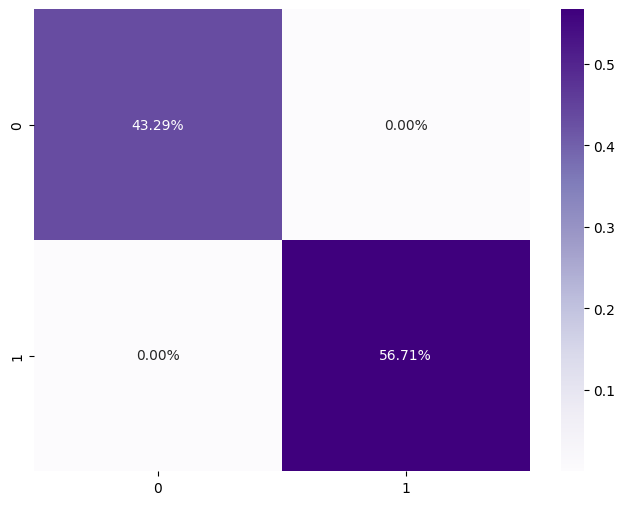

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figsize according to your preference
sns.heatmap(conf_matrix / np.sum(conf_matrix), annot=True,
            fmt='.2%', cmap='Purples')
plt.show()

###**K-Neighbors Classifier**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc # Import roc_curve and auc
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**5-Fold Cross-Validation**

# **with bias variance**

K-Nearest Neighbors Classifier (k=29)
5-Fold Cross-Validation Results:
Accuracy for each fold: [0.99140268 0.99207186 0.99158406 0.99144795 0.99155003]
Mean Accuracy: 0.9916
Standard Deviation: 0.0002


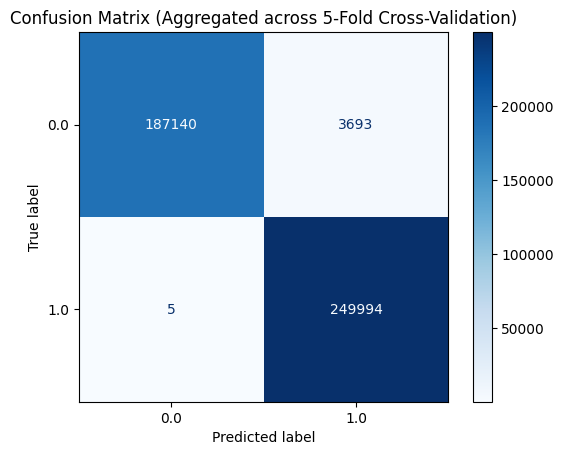

Confusion Matrix (Aggregated across 5-Fold Cross-Validation):
[[187140   3693]
 [     5 249994]]

Bias-Variance Decomposition:
Bias: 0.3633
Variance: 0.0921

Overall Accuracy: 0.9916


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already defined
# Define the KNeighborsClassifier model
model = KNeighborsClassifier(n_neighbors=29)

# Perform 5-Fold Cross-Validation
kfold_5 = KFold(n_splits=5, shuffle=True, random_state=20)
cv_results_5 = cross_val_score(model, X, y, cv=kfold_5, scoring='accuracy')

# Initialize lists to store true and predicted values
y_true_all = []
y_pred_all = []

# Initialize array to store predictions for bias-variance calculation
predictions = np.zeros((len(y), 5))

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kfold_5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Append true and predicted values for this fold
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    # Store predictions for bias-variance calculation
    predictions[test_index, fold] = y_pred

print("K-Nearest Neighbors Classifier (k=29)")
print("5-Fold Cross-Validation Results:")
print(f"Accuracy for each fold: {cv_results_5}")
print(f"Mean Accuracy: {cv_results_5.mean():.4f}")
print(f"Standard Deviation: {cv_results_5.std():.4f}")

# Compute the confusion matrix using aggregated true and predicted values
conf_matrix = confusion_matrix(y_true_all, y_pred_all)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Aggregated across 5-Fold Cross-Validation)")
plt.show()

print("Confusion Matrix (Aggregated across 5-Fold Cross-Validation):")
print(conf_matrix)

# Bias-Variance Calculation
def calculate_bias_variance(y_true, predictions):
    y_true = np.array(y_true)

    # Calculate expected predictions
    expected_predictions = np.mean(predictions, axis=1)

    # Calculate bias
    bias = np.mean((expected_predictions - y_true) ** 2)

    # Calculate variance
    variance = np.mean(np.var(predictions, axis=1))

    return bias, variance

# Calculate bias and variance
bias, variance = calculate_bias_variance(y, predictions)

print("\nBias-Variance Decomposition:")
print(f"Bias: {bias:.4f}")
print(f"Variance: {variance:.4f}")

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_true_all, y_pred_all)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

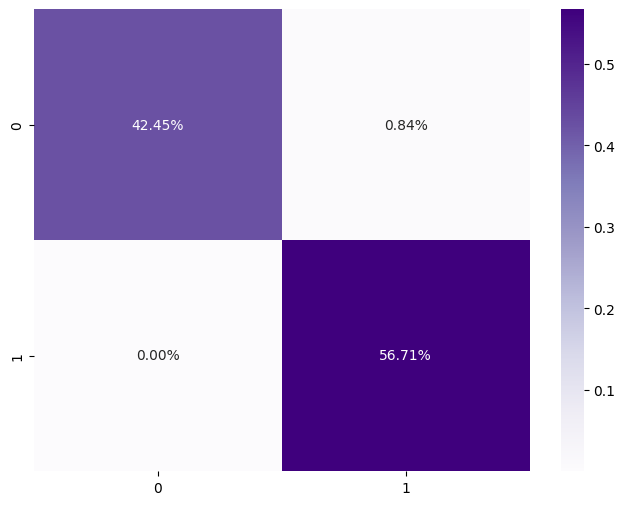

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figsize according to your preference
sns.heatmap(conf_matrix / np.sum(conf_matrix), annot=True,
            fmt='.2%', cmap='Purples')
plt.show()

# **knn 10 fold with bias variance**

K-Nearest Neighbors Classifier (k=29)
10-Fold Cross-Validation Results:
Accuracy for each fold: [0.99119862 0.99158425 0.99219654 0.99194701 0.99147063 0.99169748
 0.99160674 0.99126647 0.99156137 0.99153869]
Mean Accuracy: 0.9916
Standard Deviation: 0.0003


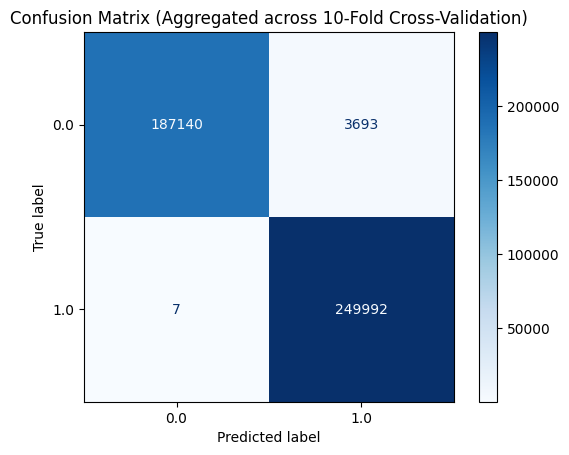

Confusion Matrix (Aggregated across 10-Fold Cross-Validation):
[[187140   3693]
 [     7 249992]]

Bias-Variance Decomposition:
Bias: 0.4594
Variance: 0.0518

Overall Accuracy: 0.9916


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already defined
# Define the KNeighborsClassifier model
model = KNeighborsClassifier(n_neighbors=29)

# Perform 10-Fold Cross-Validation
kfold_10 = KFold(n_splits=10, shuffle=True, random_state=20)
cv_results_10 = cross_val_score(model, X, y, cv=kfold_10, scoring='accuracy')

# Initialize lists to store true and predicted values
y_true_all = []
y_pred_all = []

# Initialize array to store predictions for bias-variance calculation
predictions = np.zeros((len(y), 10))

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kfold_10.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Append true and predicted values for this fold
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    # Store predictions for bias-variance calculation
    predictions[test_index, fold] = y_pred

print("K-Nearest Neighbors Classifier (k=29)")
print("10-Fold Cross-Validation Results:")
print(f"Accuracy for each fold: {cv_results_10}")
print(f"Mean Accuracy: {cv_results_10.mean():.4f}")
print(f"Standard Deviation: {cv_results_10.std():.4f}")

# Compute the confusion matrix using aggregated true and predicted values
conf_matrix = confusion_matrix(y_true_all, y_pred_all)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Aggregated across 10-Fold Cross-Validation)")
plt.show()

print("Confusion Matrix (Aggregated across 10-Fold Cross-Validation):")
print(conf_matrix)

# Bias-Variance Calculation
def calculate_bias_variance(y_true, predictions):
    y_true = np.array(y_true)

    # Calculate expected predictions
    expected_predictions = np.mean(predictions, axis=1)

    # Calculate bias
    bias = np.mean((expected_predictions - y_true) ** 2)

    # Calculate variance
    variance = np.mean(np.var(predictions, axis=1))

    return bias, variance

# Calculate bias and variance
bias, variance = calculate_bias_variance(y, predictions)

print("\nBias-Variance Decomposition:")
print(f"Bias: {bias:.4f}")
print(f"Variance: {variance:.4f}")

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_true_all, y_pred_all)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

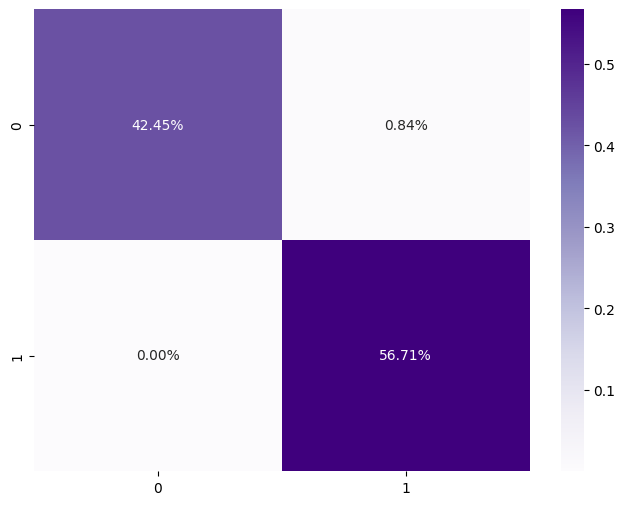

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figsize according to your preference
sns.heatmap(conf_matrix / np.sum(conf_matrix), annot=True,
            fmt='.2%', cmap='Purples')
plt.show()

# **SVC 5 fold with bias and variance**

Linear SVC Classifier
5-Fold Cross-Validation Results:
Accuracy for each fold: [0.92091145 0.92362222 0.92027539 0.92129619 0.92231699]
Mean Accuracy: 0.9217
Standard Deviation: 0.0012


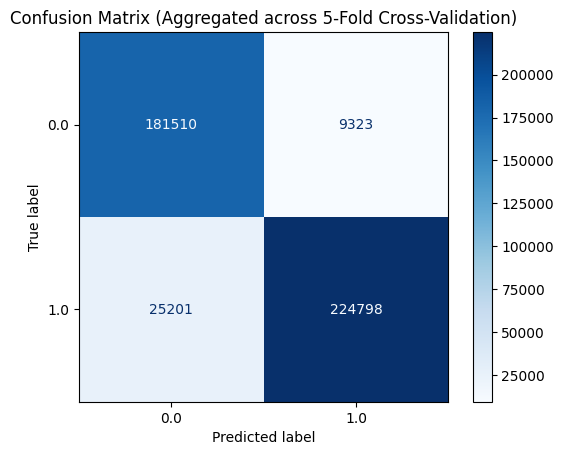

Confusion Matrix (Aggregated across 5-Fold Cross-Validation):
[[181510   9323]
 [ 25201 224798]]

Bias-Variance Decomposition:
Bias: 0.3844
Variance: 0.0850

Overall Accuracy: 0.9217


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already defined
# Define the LinearSVC model
model = LinearSVC(random_state=20)

# Perform 5-Fold Cross-Validation
kfold_5 = KFold(n_splits=5, shuffle=True, random_state=20)
cv_results_5 = cross_val_score(model, X, y, cv=kfold_5, scoring='accuracy')

# Initialize lists to store true and predicted values
y_true_all = []
y_pred_all = []

# Initialize array to store predictions for bias-variance calculation
predictions = np.zeros((len(y), 5))

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kfold_5.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Append true and predicted values for this fold
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    # Store predictions for bias-variance calculation
    predictions[test_index, fold] = y_pred

print("Linear SVC Classifier")
print("5-Fold Cross-Validation Results:")
print(f"Accuracy for each fold: {cv_results_5}")
print(f"Mean Accuracy: {cv_results_5.mean():.4f}")
print(f"Standard Deviation: {cv_results_5.std():.4f}")

# Compute the confusion matrix using aggregated true and predicted values
conf_matrix = confusion_matrix(y_true_all, y_pred_all)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Aggregated across 5-Fold Cross-Validation)")
plt.show()

print("Confusion Matrix (Aggregated across 5-Fold Cross-Validation):")
print(conf_matrix)

# Bias-Variance Calculation
def calculate_bias_variance(y_true, predictions):
    y_true = np.array(y_true)

    # Calculate expected predictions
    expected_predictions = np.mean(predictions, axis=1)

    # Calculate bias
    bias = np.mean((expected_predictions - y_true) ** 2)

    # Calculate variance
    variance = np.mean(np.var(predictions, axis=1))

    return bias, variance

# Calculate bias and variance
bias, variance = calculate_bias_variance(y, predictions)

print("\nBias-Variance Decomposition:")
print(f"Bias: {bias:.4f}")
print(f"Variance: {variance:.4f}")

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_true_all, y_pred_all)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

# **SVC 10 fold with bias and variance**

Linear SVC Classifier
10-Fold Cross-Validation Results:
Accuracy for each fold: [0.92053806 0.92117321 0.924869   0.92219223 0.92110337 0.91996915
 0.92230565 0.92028673 0.92187465 0.92269129]
Mean Accuracy: 0.9217
Standard Deviation: 0.0014


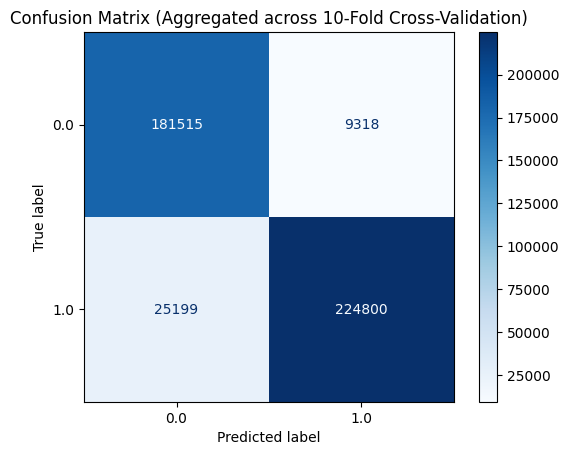

Confusion Matrix (Aggregated across 10-Fold Cross-Validation):
[[181515   9318]
 [ 25199 224800]]

Bias-Variance Decomposition:
Bias: 0.4704
Variance: 0.0478

Overall Accuracy: 0.9217


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already defined
# Define the LinearSVC model
model = LinearSVC(random_state=20)

# Perform 10-Fold Cross-Validation
kfold_10 = KFold(n_splits=10, shuffle=True, random_state=20)
cv_results_10 = cross_val_score(model, X, y, cv=kfold_10, scoring='accuracy')

# Initialize lists to store true and predicted values
y_true_all = []
y_pred_all = []

# Initialize array to store predictions for bias-variance calculation
predictions = np.zeros((len(y), 10))

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kfold_10.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Append true and predicted values for this fold
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    # Store predictions for bias-variance calculation
    predictions[test_index, fold] = y_pred

print("Linear SVC Classifier")
print("10-Fold Cross-Validation Results:")
print(f"Accuracy for each fold: {cv_results_10}")
print(f"Mean Accuracy: {cv_results_10.mean():.4f}")
print(f"Standard Deviation: {cv_results_10.std():.4f}")

# Compute the confusion matrix using aggregated true and predicted values
conf_matrix = confusion_matrix(y_true_all, y_pred_all)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Aggregated across 10-Fold Cross-Validation)")
plt.show()

print("Confusion Matrix (Aggregated across 10-Fold Cross-Validation):")
print(conf_matrix)

# Bias-Variance Calculation
def calculate_bias_variance(y_true, predictions):
    y_true = np.array(y_true)

    # Calculate expected predictions
    expected_predictions = np.mean(predictions, axis=1)

    # Calculate bias
    bias = np.mean((expected_predictions - y_true) ** 2)

    # Calculate variance
    variance = np.mean(np.var(predictions, axis=1))

    return bias, variance

# Calculate bias and variance
bias, variance = calculate_bias_variance(y, predictions)

print("\nBias-Variance Decomposition:")
print(f"Bias: {bias:.4f}")
print(f"Variance: {variance:.4f}")

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_true_all, y_pred_all)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

# **Model Accuracy**

In [ ]:
# Model names and their accuracy scores
models = [ 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier']
accuracies = [0.8241, 0.9998, 0.9556, 0.9999]

# Create a bar plot for accuracies with seaborn
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")  # Set a whitegrid background for better readability
ax = sns.barplot(x=accuracies, y=models, palette='viridis')  # Change the color palette

# Set the x-axis label to "Accuracy"
plt.xlabel("Accuracy", fontsize=14, fontweight="bold")

# Add labels to the bars with adjusted positioning
for i, v in enumerate(accuracies):
    ax.text(v + 0.005, i, f'{v:.2f}', color='black', va='center', fontsize=12)

# Set the title
plt.title("Model Accuracies(5-Fold Cross Validation)", fontsize=16, fontweight="bold")

# Show the plot
plt.show()

In [ ]:
# Model names and their accuracy scores
models = [  'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier']
accuracies = [  0.9999, 0.9997, 0.9999]

# Create a bar plot for accuracies with seaborn
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")  # Set a whitegrid background for better readability
ax = sns.barplot(x=accuracies, y=models, palette='viridis')  # Change the color palette

# Set the x-axis label to "Accuracy"
plt.xlabel("Accuracy", fontsize=14, fontweight="bold")

# Add labels to the bars with adjusted positioning
for i, v in enumerate(accuracies):
    ax.text(v + 0.005, i, f'{v:.2f}', color='black', va='center', fontsize=12)

# Set the title
plt.title("Model Accuracies(10-Fold Cross Validation)", fontsize=16, fontweight="bold")

# Show the plot
plt.show()

# **Feature Importances**

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Train the RandomForestClassifier
model = RandomForestClassifier(random_state=20)
model.fit(X_train, y_train)

# Get feature importances from the model
feature_importances = model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort the features based on importance
sorted_idx = np.argsort(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Classifier - Feature Importance")
plt.show()

In [ ]:

from sklearn.ensemble import RandomForestClassifier
# 'Churn' is actual output feature
actual_output = df['Churn']

# 'features' is a DataFrame containing the features you used for prediction
features = df.drop('Churn', axis=1)

# Train a GradientBoostingClassifier
model = RandomForestClassifier(random_state=20)
model.fit(features, actual_output)

# Make predictions
predicted_output = model.predict(features)

# Create a new column for predicted output
df['predicted_Churn'] = predicted_output

# Display the DataFrame with the new column
print(df[['Churn', 'predicted_Churn']])

In [ ]:
df[['Age','Gender','Churn', 'predicted_Churn']].head(50)

In [ ]:
df[['Age','Gender','Churn', 'predicted_Churn']].tail(50)

In [ ]:
#churn
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score

# Initialize a dictionary to store metrics
metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Initialize variables for regression metrics
    mse = None
    mae = None
    rmse = None

    if name not in ['LogisticRegression', 'KNeighborsClassifier']:
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)

    # Store metrics in the dictionary
    metrics[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'MSE': mse,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display the results
for model_name, metric_values in metrics.items():
    if metric_values['MSE'] is not None and metric_values['MAE'] is not None and metric_values['RMSE'] is not None:
        print(f"{model_name}, RMSE: {metric_values['RMSE']:.2f}, MAE: {metric_values['MAE']:.2f}, MSE: {metric_values['MSE']:.2f}, Accuracy: {metric_values['Accuracy']:.2f}, Precision: {metric_values['Precision']:.2f}, Recall: {metric_values['Recall']:.2f}, F1 Score: {metric_values['F1 Score']:.2f}")
    else:
        print(f"{model_name}, RMSE: N/A, MAE: N/A, MSE: N/A, Accuracy: {metric_values['Accuracy']:.2f}, Precision: {metric_values['Precision']:.2f}, Recall: {metric_values['Recall']:.2f}, F1 Score: {metric_values['F1 Score']:.2f}")


In [ ]:
#churn
# Model names and their accuracy, precision, recall, and F1 score
models = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier' , 'XGBClassifier']
accuracy = [0.75, 0.83, 0.91, 0.96, 0.96, 0.96]
precision = [0.77, 0.90, 0.91, 1.00, 1.00, 1.00]
recall = [0.78, 0.78, 0.93, 0.92, 0.92, 0.92]
f1_score = [0.78, 0.84, 0.92, 0.96, 0.96, 0.96]

# Create a larger figure with subplots for accuracy, precision, recall, and F1 score
plt.figure(figsize=(30, 8))

# Plot Accuracy
plt.subplot(141)
plt.pie(accuracy, labels=models, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 16})
plt.title('Accuracy')

# Plot Precision
plt.subplot(142)
plt.pie(precision, labels=models, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 16})
plt.title('Precision')

# Plot Recall
plt.subplot(143)
plt.pie(recall, labels=models, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 16})
plt.title('Recall')

# Plot F1 score
plt.subplot(144)
plt.pie(f1_score, labels=models, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 16})
plt.title('F1 Score')

# Adjust layout
plt.tight_layout(pad=5.0)

# Adding titles and percentages
plt.suptitle("Model Evaluation Metrics", fontsize=24, fontweight="bold")
plt.show()